Data and library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from matplotlib.cm import get_cmap


In [2]:
AllForams = pd.read_csv("C:/Users/jorge/OneDrive/Desktop/AG-211/AllForams_CSV.csv", header = 0, index_col = None)
magsus = pd.read_csv("C:/Users/jorge/OneDrive/Desktop/AG-211/MAGSUS_BELLSUND/Magsus_CSV.csv", header = 0, index_col = None)
shear = pd.read_csv("C:/Users/jorge/OneDrive/Desktop/AG-211/ShearStreght.csv", header = 0, index_col = None)
wc = pd.read_csv("C:/Users/jorge/OneDrive/Desktop/AG-211/WC_csv.csv", header = 0, index_col = None)
grains = pd.read_csv("C:/Users/jorge/OneDrive/Desktop/AG-211/GrainSize_csv.csv", header = 0, index_col = None)
log = pd.read_csv("C:/Users/jorge/OneDrive/Desktop/AG-211/logcsv.csv", header = 0, index_col = None)
IRD = pd.read_csv("C:/Users/jorge/OneDrive/Desktop/AG-211/IRD_csv.csv", header = 0, index_col = None)
newIRD = pd.read_csv("C:/Users/jorge/OneDrive/Desktop/AG-211/new_IRD_CSV.csv", header = 0, index_col = None)
LogItems = pd.read_csv("C:/Users/jorge/OneDrive/Desktop/AG-211/Log_items.csv", header = 0, index_col = None)
RoundnessIRD = pd.read_csv("C:/Users/jorge/OneDrive/Desktop/AG-211/RoundnessAnalysis_CSV.csv", header = 0, index_col = None)

IRD_1mm =  IRD[IRD['Size'] == '1mm']
IRD_100um =  IRD[IRD['Size'] == '100micron']

IRD_1mm = IRD_1mm.reset_index(drop=True)
IRD_100um = IRD_100um.reset_index(drop=True)


New_IRD_1mm =  newIRD[newIRD['Size'] == '1mm']
New_IRD_100um =  newIRD[newIRD['Size'] == '100micron']

New_IRD_1mm = New_IRD_1mm.reset_index(drop=True)
New_IRD_100um = New_IRD_100um.reset_index(drop=True)


values = {"WR": 6, "R": 5, "SR": 4, "SA": 3, "A": 2, "VA": 1}
RoundnessIRD["Value"] = RoundnessIRD["Roundness"].map(values)

Forams_ship =  AllForams[AllForams['Where'] == 'Ship']
Forams_lab =  AllForams[AllForams['Where'] == 'Lab']

Forams_ship = Forams_ship.reset_index(drop=True)
Forams_lab = Forams_lab.reset_index(drop=True)

foram_cols = ['Sample num', 'Depth', 'Where', 'Who', 'Total', 'Subsample weight',
       'Foram density [n/g]', 'Richness', 'Shannon Alpha index',
       'Astrononion galloway', 'Buccella frigida', 'Cassidulina neoteretis',
       'Cassidulina reniforme', 'Cibicides lobatus', 'Elphidium excavatum',
       'Elphibium subarcticum', 'Fissirina sp', 'Globabulimina sp.',
       'Haynesina Germanica', 'Haynesina Orbiculare', 'Islandiella helenae',
       'Islandiella norcrossi', 'Islandiella spp.', 'Nonionella iridea',
       'Nonionellina labradorica', 'Neogloboquadrina pachyderma',
       'Stetsonia horvathi', 'Stainforthia loeblichi',
       'Silicosigmoilina groenlandica', 'Trifarina fluens', 'Indeterminate']

species = ['Astrononion galloway', 'Buccella frigida', 'Cassidulina neoteretis',
       'Cassidulina reniforme', 'Cibicides lobatus', 'Elphidium excavatum',
       'Elphibium subarcticum', 'Fissirina sp', 'Globabulimina sp.',
       'Haynesina Germanica', 'Haynesina Orbiculare', 'Islandiella helenae',
       'Islandiella norcrossi', 'Islandiella spp.', 'Nonionella iridea',
       'Nonionellina labradorica', 'Neogloboquadrina pachyderma',
       'Stetsonia horvathi', 'Stainforthia loeblichi',
       'Silicosigmoilina groenlandica', 'Trifarina fluens', 'Indeterminate']

plt_species = ['Buccella frigida', 'Cassidulina reniforme', 'Cibicides lobatus', 'Elphidium excavatum', 'Elphibium subarcticum', 'Islandiella helenae','Islandiella norcrossi','Nonionellina labradorica']

magsus = magsus.apply(pd.to_numeric, errors='ignore')
shear = shear.apply(pd.to_numeric, errors='ignore')

C:\Users\jorge\AppData\Local\Temp\ipykernel_788\1490055383.py:57: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  magsus = magsus.apply(pd.to_numeric, errors='ignore')
C:\Users\jorge\AppData\Local\Temp\ipykernel_788\1490055383.py:58: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  shear = shear.apply(pd.to_numeric, errors='ignore')


CTD plotting

Comp Log

In [105]:
def add_axis_relative_text(ax, x_data_pos, y_axis_offset, text):
    ax.text(x_data_pos, 1 + y_axis_offset, text, 
            ha='center', va='bottom',
            transform=ax.get_xaxis_transform(), fontsize = 12)  # Critical transform
# For SUBDIVISION labels (cl, sl, etc.)
def add_minor_axis_relative_text(ax, x_data_pos, y_axis_offset, text):
    ax.text(x_data_pos, 1 + y_axis_offset, text,
            ha='center', va='bottom', 
            transform=ax.get_xaxis_transform(), fontsize = 12)

def plot_log(ax):
    # LAYOUT FOR THE LOG
    ax.xaxis.set_major_locator(ticker.FixedLocator([2, 4, 7, 9]))
    ax.xaxis.set_minor_locator(ticker.FixedLocator([3, 5, 6, 8]))
    ax.xaxis.set_major_formatter(ticker.NullFormatter())  # Remove numbers

    # Style ticks for FIRST SUBPLOT
    ax.tick_params(which='major', length=8, width=1.2, labelsize=10)
    ax.tick_params(which='minor', length=4, width=1.2)

    add_axis_relative_text(ax, 1, 0.016, 'Lithology') 
    add_axis_relative_text(ax, 3, 0.016, 'MUD')   # 5% above axis
    add_axis_relative_text(ax, 5.5, 0.016, 'SAND')
    add_axis_relative_text(ax, 8, 0.016, 'GRAV')
    add_axis_relative_text(ax, 9.6, 0.016, 'BLDR')

    # SUBDIVISIONS (cl, sl, etc.)
    sub_labels = ['cl', 'sl', 'f', 'm', 'c', 'f', 'c']
    sub_positions = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
    for pos, label in zip(sub_positions, sub_labels):
        add_minor_axis_relative_text(ax, pos, 0.0015, label) 

    ax.set_xlim(0, 10)
    ax.set_ylim(0, 520)
    ax.set_yticks(np.arange(0, 520, 20))
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # PLOTTING THE LOG
    ax.plot(log['Val'], log['Depth'], linewidth = 1, marker = None, color = 'k')
    ax.set_title('Sedimentological log', loc='center', y = 1.035, fontsize = 14)

    type_symbols = {
    'DS': 'x',
    'SF': 'o',
    'WS': 's',
    'SS': '^'
    }
    
    fullname = {
    'DS': 'Dropstone',
    'SF': 'Shell Fragment',
    'WS': 'Whole Shell',
    'SS': 'Single Shell'
    }


    type_x_positions = {
    'DS': 5.5,
    'SF': 6.0,
    'WS': 6.5,
    'SS': 7.0
    }

    for type_name in type_symbols:
        subset = LogItems[LogItems['Type'] == type_name]
        x_vals = [type_x_positions[type_name]] * len(subset)
        ax.scatter(x_vals, subset['Depth'], label=fullname[type_name],
                    marker=type_symbols[type_name])

    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_ylabel('Depth [cm]', fontsize = 16)



def plot_magsus(ax):
    ax.plot(magsus['Value'], magsus['Depth'], linewidth = 1, marker = ".", color = 'k')
    ax.set_title('Magnetic Susceptibility \n [SI]', loc='center', fontsize = 14, y= 1.02)
    ax.xaxis.tick_top()
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
  #  ax.spines['left'].set_visible(False)

    ax.set_xlim(0, 80)


    ax.tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )

def plot_watercontent(ax):
    ax.plot(wc['Water content [%]'], wc['Depth  [cm]'], linewidth = 1, marker = ".", color = 'k')
    ax.set_title('Water Content (%)', loc='center', fontsize = 14, y= 1.035)
    ax.xaxis.tick_top()
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
  #  ax.spines['left'].set_visible(False)

    ax.set_xlim(25, 45)


    ax.tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )

def plot_shear(ax):
    ax.plot(shear['Shear Streght [kPa]'], shear['Depth [cm]'], linewidth = 1, marker = ".", color = 'k')
    ax.set_title('Shear Strength (kPa)', loc='center', fontsize = 14, y= 1.035)
    ax.xaxis.tick_top()
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
   # ax.spines['left'].set_visible(False)

    ax.set_xlim(0, 40)


    ax.tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )

def plot_ird(ax1, ax2):
    ax1.plot(New_IRD_100um['Crystalline%'], New_IRD_100um['Depth'], linewidth = 1, marker = ".", color = 'blue', label = 'Crystalline')
    ax1.plot(New_IRD_100um['Sedimentary%'], New_IRD_100um['Depth'], linewidth = 1, marker = "x", linestyle = '--', color = 'Orange', label = 'Sedimentary')
    ax1.plot(New_IRD_100um['Coal%'], New_IRD_100um['Depth'], linewidth = 1, marker = "+", color = 'black', label = 'Coal')
    
    ax1.plot(New_IRD_100um['Other%'], New_IRD_100um['Depth'], linewidth = 1, linestyle = "-.", color = 'grey', label = 'Coal')

    ax1.set_title('IRD \n 100μm to 1mm [%]', loc='center', fontsize = 14, y= 1.02)
    ax1.xaxis.tick_top()

    ax1.set_xticks([0, 20, 40, 60, 80, 100])
    ax1.set_xlim(0, 100)

    ax1.spines['bottom'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    #ax1.spines['left'].set_visible(False)


    ax1.tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )

    ax2.plot(New_IRD_1mm['Crystalline%'], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", color = 'blue', label = 'Crystalline')
    ax2.plot(New_IRD_1mm['Sedimentary%'], New_IRD_1mm['Depth'], linewidth = 1, marker = "x", linestyle = '--', color = 'orange', label = 'Sedimentary')
    ax2.plot(New_IRD_1mm['Coal%'], New_IRD_1mm['Depth'], linewidth = 1, marker = "+", color = 'black', label = 'Coal')

    ax2.plot(New_IRD_1mm['Other%'], New_IRD_1mm['Depth'], linewidth = 1, linestyle = "-.", color = 'grey', label = 'Other')

    ax2.set_title('IRD >1mm [%]', loc='center', fontsize = 14, y= 1.035)
    ax2.xaxis.tick_top()

    ax2.set_xticks([0, 20, 40, 60, 80, 100])
    ax2.set_xlim(0, 100)


    ax2.spines['bottom'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    #ax2.spines['left'].set_visible(False)

    ax2.legend(loc = 'upper right')
    ax2.tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )

def plot_grainsize(ax1 , ax2):
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)

    # ——— grain‐size panels ———
    # common plotting function
    def plot_grains(ax):
        ax.plot(grains['>1mm [%]'],   grains['Depth [cm]'], lw=1, ls='solid', marker='.',  ms=8)
        ax.plot(grains['CUM_1-100'],   grains['Depth [cm]'], lw=1, ls='dashed', marker='+',  ms=8)
        ax.plot(grains['CUM_100-63'],  grains['Depth [cm]'], lw=1, ls='dotted', marker='*', ms=8)
        ax.plot(grains['CUM_<63'],     grains['Depth [cm]'], lw=1, ls='dashdot', marker='x', ms=8)


        viridis = get_cmap('viridis')
        colors = [viridis(i) for i in np.linspace(0.15, 0.85, 4)] 

        ax.fill_betweenx(grains['Depth [cm]'], grains['>1mm [%]'], 0, hatch='o', label='>1 mm', facecolor="blue", alpha = 0.1, edgecolor="k", linewidth=0.0)	
        ax.fill_betweenx(grains['Depth [cm]'], grains['>1mm [%]'], grains['CUM_1-100'], hatch='---', label='1 mm–100 µm', facecolor="red", alpha = 0.1, edgecolor="k", linewidth=0.0)
        ax.fill_betweenx(grains['Depth [cm]'], grains['CUM_1-100'], grains['CUM_100-63'], hatch='xxx', label='100 µm–63 µm', facecolor="green", alpha = 0.1, edgecolor="k", linewidth=0.0)
        ax.fill_betweenx(grains['Depth [cm]'], grains['CUM_100-63'], grains['CUM_<63'], hatch='|||', label='< 63 µm', facecolor="orange", alpha = 0.1, edgecolor= "k", linewidth=0.0)


        ax.fill_betweenx(grains['Depth [cm]'], grains['>1mm [%]'], 0, hatch='o', facecolor="none", alpha = 0.1, edgecolor="k", linewidth=0.0)	
        ax.fill_betweenx(grains['Depth [cm]'], grains['>1mm [%]'], grains['CUM_1-100'], hatch='---', facecolor="none", alpha = 0.1, edgecolor="k", linewidth=0.0)
        ax.fill_betweenx(grains['Depth [cm]'], grains['CUM_1-100'], grains['CUM_100-63'], hatch='xxx', facecolor="none", alpha = 0.1, edgecolor="k", linewidth=0.0)
        ax.fill_betweenx(grains['Depth [cm]'], grains['CUM_100-63'], grains['CUM_<63'], hatch='|||', facecolor="none", alpha = 0.1, edgecolor= "k", linewidth=0.0)


        ax.invert_yaxis()
        ax.xaxis.tick_top()

    # left (zoomed‐in) segment 0–20%
    plot_grains(ax1)
    ax1.set_xlim(0, 20)
    ax1.spines['right'].set_visible(False)
    #ax1.spines['left'].set_visible(False)
    ax1.tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )

    # right (zoomed‐in) segment 95–100%
    plot_grains(ax2)
    ax2.set_xlim(96, 100)#
    
    ax2.set_xticks([100])#

    ax2.spines['left'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    ax2.tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )

    # pick your desired angle (in degrees) and total slash‐length (in figure‐fractions)
    angle = 80          # degrees from horizontal
    length = 0.01       # total length of each slash in figure‐fraction units

    # convert to half‐offsets in x and y
    θ = np.deg2rad(angle)
    dx = (length/2) * np.cos(θ)
    dy = (length/2) * np.sin(θ)

    # get the four corner points as before
    boxes = [
        (ax1.get_position().x1, ax1.get_position().y1),
    #   (ax1.get_position().x1, ax1.get_position().y0),
        (ax2.get_position().x0, ax2.get_position().y1),
    #   (ax2.get_position().x0, ax2.get_position().y0),
    ]

    # draw each slash at the new angle
    for (x0, y0) in boxes:
        fig.add_artist(Line2D([x0 - dx, x0 + dx],
                            [y0 - dy, y0 + dy],
                            transform=fig.transFigure,
                            color='k',
                            linewidth=1))

    # ——— labels & legend ———
    #ax1.set_xlabel('Grain size distribution [%]')

    #ax1.set_title('Cummulative Grain Size \n Distribution', loc='right', y = 1.05)

    b1 = ax1.get_position()   # left grain segment
    b2 = ax2.get_position()   # right grain segment
    yt_title = b1.y1 + 0.02   # title 2% above the top of the panels

    xcg = b1.x0 + (b2.x1 - b1.x0)/2            # midpoint spanning ax1→ax2

    fig.text(xcg, yt_title, 'Cummulative grain size \n distribution [%]',ha='center', fontsize=14)

    # collect all grain‐size lines for a single legend
    lines, labels = ax2.get_legend_handles_labels()
    ax2.legend(lines, labels, loc='upper right', bbox_to_anchor=(1, 1),  handlelength=2, handleheight=2)

def plot_biodiversity(ax):

    msize = 8
    ax.plot(AllForams['Richness'], AllForams['Depth'], linestyle='-', color='black', alpha = 0.7, zorder=1)
    ax.plot(Forams_ship['Richness'], Forams_ship['Depth'], 'x', color = 'black', zorder = 2, label = 'Ship')
    ax.plot(Forams_lab['Richness'], Forams_lab['Depth'], 'o', color = 'black', zorder = 2, label = 'Lab')
    ax.set_title('Foram species richness \n [num. species]', loc='center', fontsize = 14, y= 1.02)

    ax.xaxis.tick_top()
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    ax.legend()
    ax.set_xlim(2, 12)
    ax.set_xticks([2, 4, 6, 8, 10, 12])

    ax.tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )

def plot_foram1(ax):
    ax.plot(AllForams['Nonionellina labradorica'], AllForams['Depth'], linestyle='-', color='black', alpha = 0.7, zorder=1)
    ax.plot(Forams_ship['Nonionellina labradorica'], Forams_ship['Depth'], 'x', color = 'black', zorder = 2)
    ax.plot(Forams_lab['Nonionellina labradorica'], Forams_lab['Depth'], 'o', color = 'black', zorder = 2)
    ax.set_title('Nonionellina \n labradorica [%]', loc='center', fontsize = 14, y= 1.02, style='italic')

    ax.xaxis.tick_top()
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    ax.set_xlim(0, 100)

    ax.tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )

def plot_foram2(ax):
    ax.plot(AllForams['Elphidium excavatum'], AllForams['Depth'], linestyle='-', color='black', alpha = 0.7, zorder=1)
    ax.plot(Forams_ship['Elphidium excavatum'], Forams_ship['Depth'], 'x', color = 'black', zorder = 2)
    ax.plot(Forams_lab['Elphidium excavatum'], Forams_lab['Depth'], 'o', color = 'black', zorder = 2)
    ax.set_title('Elphidium \n excavatum [%]', loc='center', fontsize = 14, y= 1.02, style='italic')

    ax.xaxis.tick_top()
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    ax.set_xlim(0, 100)

    ax.tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )


C:\Users\jorge\AppData\Local\Temp\ipykernel_788\1464709358.py:195: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('viridis')
C:\Users\jorge\AppData\Local\Temp\ipykernel_788\1245977015.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


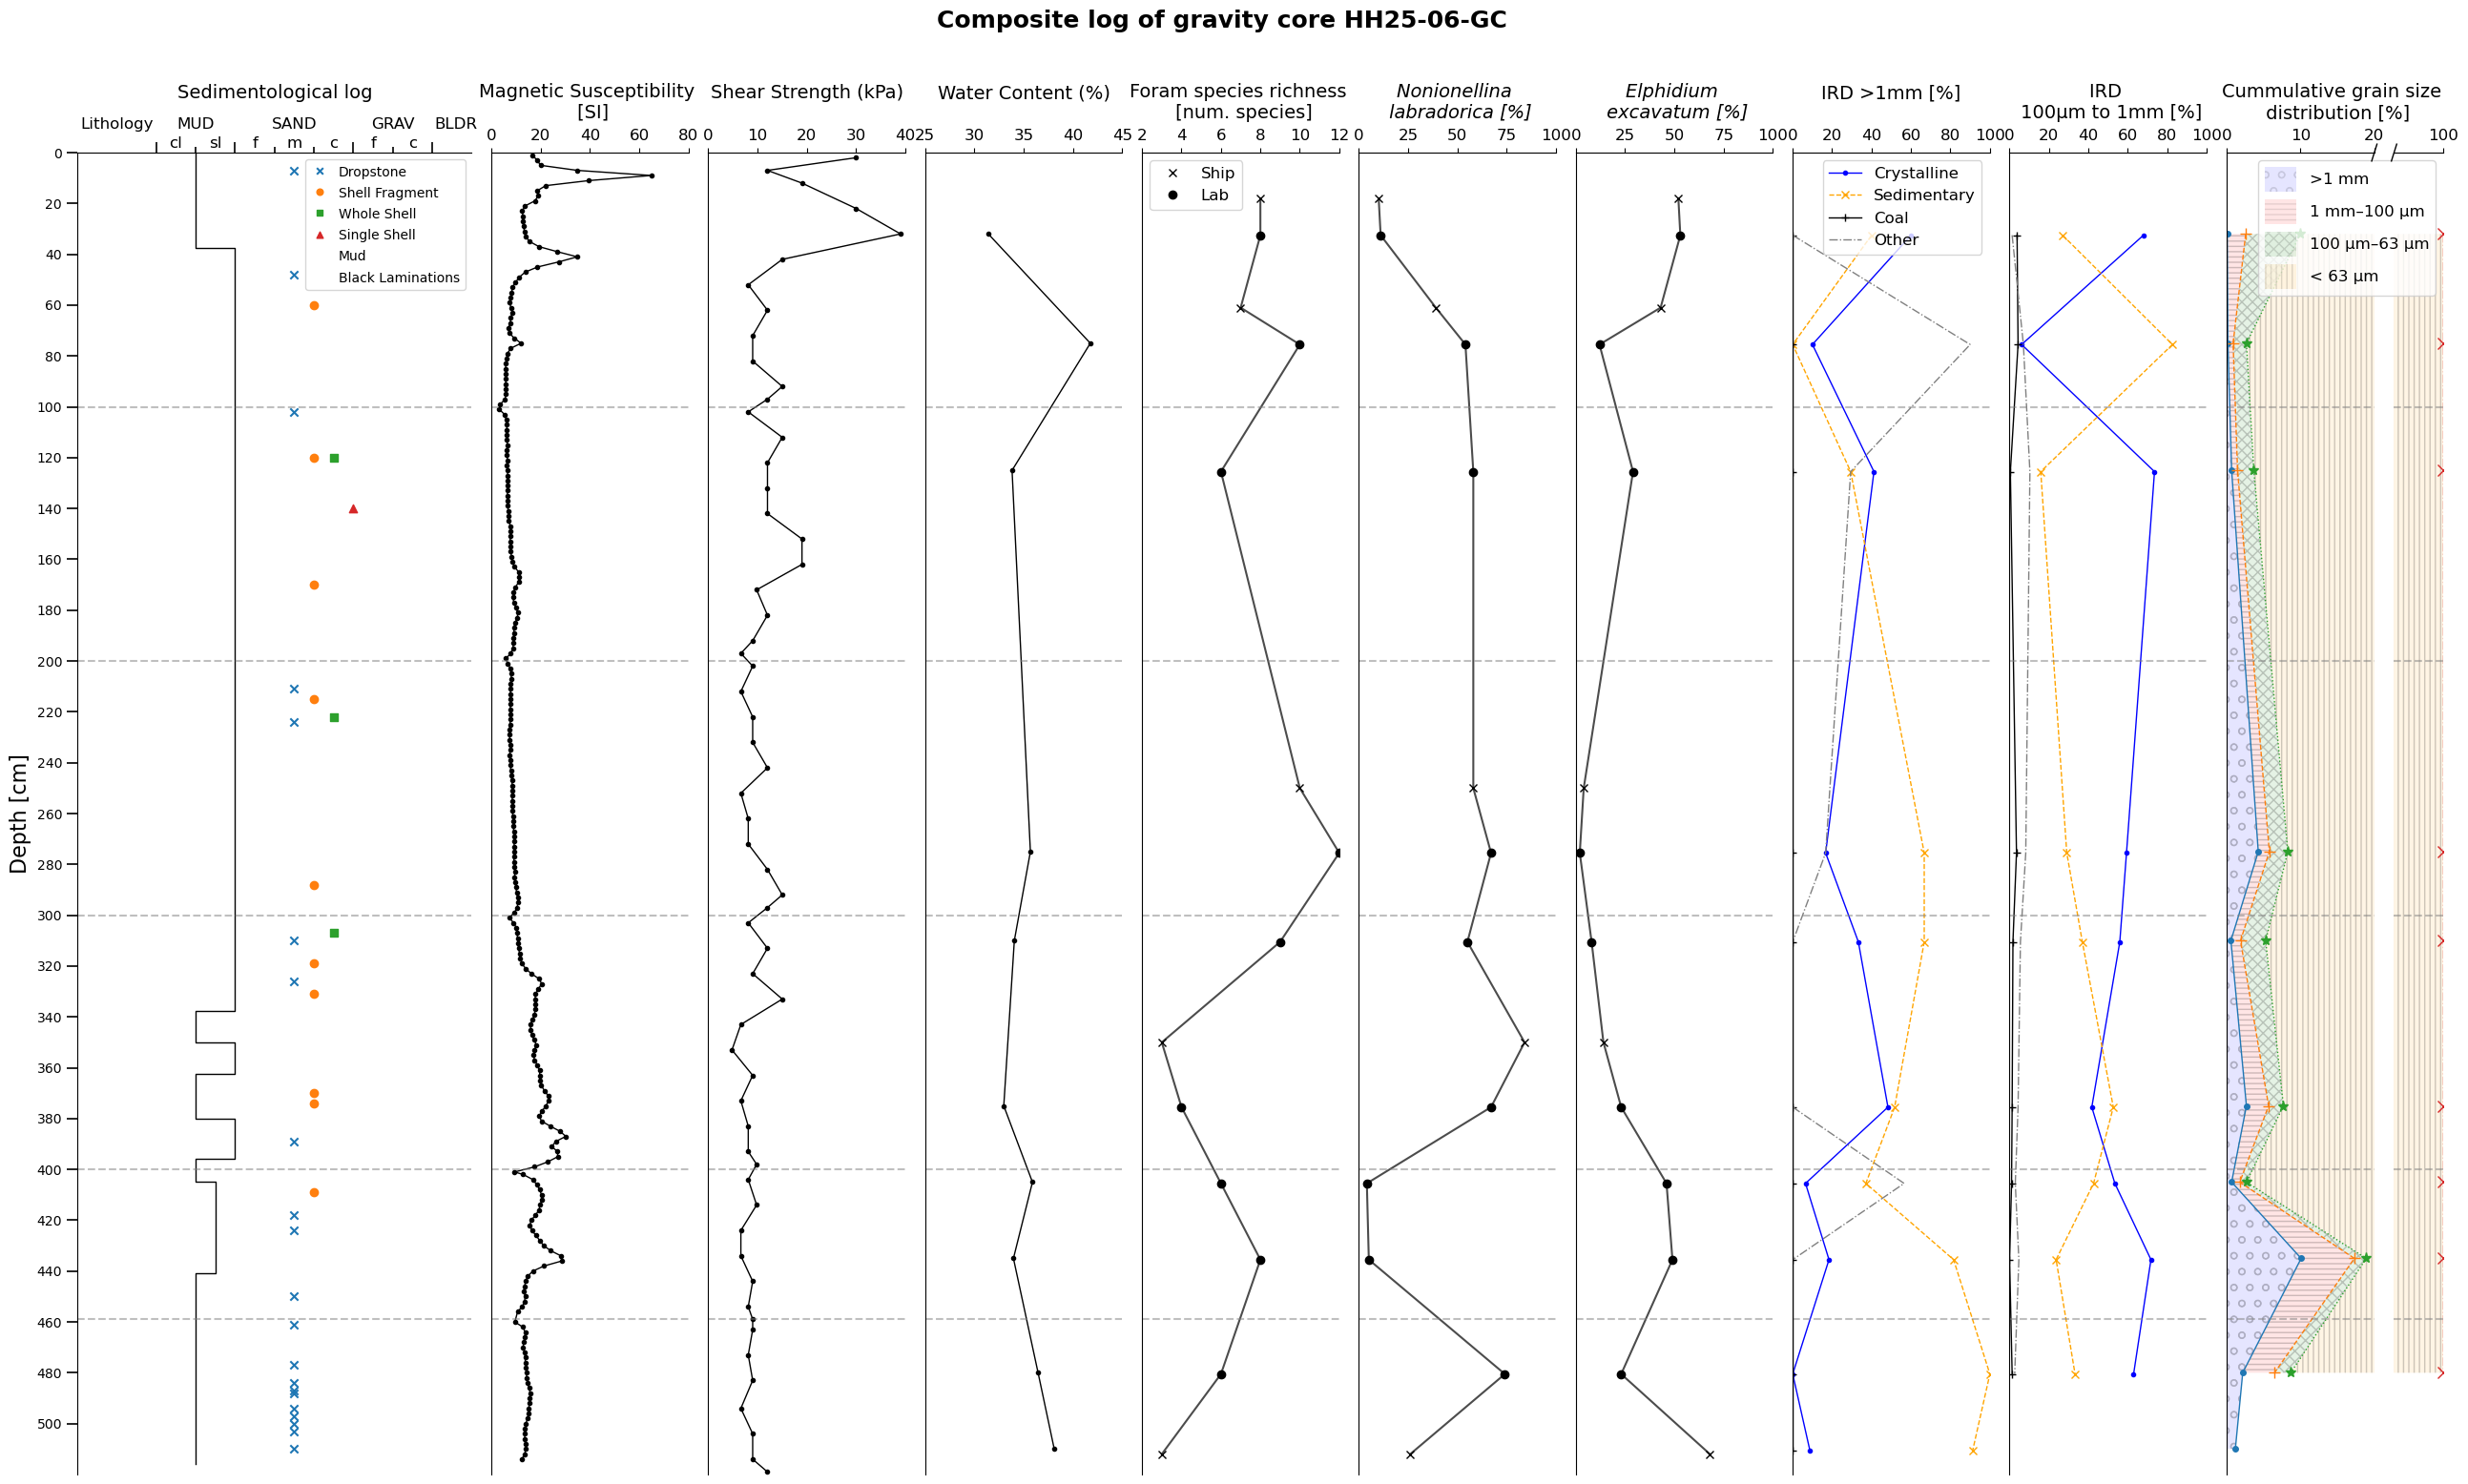

In [106]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Define width ratios
widths = [2] + [1]*8 + [0.75, 0.25]  # 12 columns total

fig = plt.figure(figsize=(32, 18))  # adjust figsize to your needs
gs = gridspec.GridSpec(nrows=1, ncols=11, width_ratios=widths, wspace=0.1)

axes = []
for i in range(10):
    if i < 9:
        ax = fig.add_subplot(gs[0, i], sharey=axes[0] if axes else None)
        axes.append(ax)
    else:
        ax1 = fig.add_subplot(gs[0, 9], sharey=axes[0])
        ax2 = fig.add_subplot(gs[0, 10], sharey=axes[0])
        axes.extend([ax1, ax2])

plot_log(axes[0])

plot_magsus(axes[1])

plot_shear(axes[2])

plot_watercontent(axes[3])

plot_biodiversity(axes[4])

plot_foram1(axes[5])

plot_foram2(axes[6])

plot_ird(axes[8], axes[7])

plot_grainsize(axes[9], axes[10])

for ax in axes:
    ax.axhline(y = 100, linestyle='--', color='grey', alpha=0.5)
    ax.axhline(y = 200, linestyle='--', color='grey', alpha=0.5)
    ax.axhline(y = 300, linestyle='--', color='grey', alpha=0.5)
    ax.axhline(y = 400, linestyle='--', color='grey', alpha=0.5)
    ax.axhline(y = 459, linestyle='--', color='grey', alpha=0.5)


    #x_min, x_max = ax.get_xlim()
    #x_fill = [x_min, x_max]

   # ax.fill_between(x_fill, 400, 420, linestyle='--', color='grey', alpha=0.5)


# Existing legend handles and labels
handles, labels = axes[0].get_legend_handles_labels()

# Create phantom entries (invisible lines)
phantom1 = Line2D([], [], color='none', label='Mud')
phantom2 = Line2D([], [], color='none', label='Black Laminations')

# Add them to the legend
handles.extend([phantom1, phantom2])
labels.extend(['Mud', 'Black Laminations'])

axes[0].legend(loc = 'upper right', fontsize = 10, handles=handles, labels=labels, markerscale = 0.8, handlelength=1.3, handleheight=1.3)


fig.text(0.50, 0.95, "Composite log of gravity core HH25-06-GC", ha='center', va='bottom', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()



Foram plots

In [5]:
Forams_ship =  AllForams[AllForams['Where'] == 'Ship']
Forams_lab =  AllForams[AllForams['Where'] == 'Lab']

Forams_ship = Forams_ship.reset_index(drop=True)
Forams_lab = Forams_lab.reset_index(drop=True)

foram_cols = ['Sample num', 'Depth', 'Where', 'Who', 'Total', 'Subsample weight',
       'Foram density [n/g]', 'Richness', 'Shannon Alpha index',
       'Astrononion galloway', 'Buccella frigida', 'Cassidulina neoteretis',
       'Cassidulina reniforme', 'Cibicides lobatus', 'Elphidium excavatum',
       'Elphidium subarcticum', 'Fissirina sp', 'Globabulimina sp.',
       'Haynesina Germanica', 'Haynesina Orbiculare', 'Islandiella helenae',
       'Islandiella norcrossi', 'Islandiella spp.', 'Nonionella iridea',
       'Nonionellina labradorica', 'Neogloboquadrina pachyderma',
       'Stetsonia horvathi', 'Stainforthia loeblichi',
       'Silicosigmoilina groenlandica', 'Trifarina fluens', 'Indeterminate']

species = ['Astrononion galloway', 'Buccella frigida', 'Cassidulina neoteretis',
       'Cassidulina reniforme', 'Cibicides lobatus', 'Elphidium excavatum',
       'Elphidium subarcticum', 'Fissirina sp', 'Globabulimina sp.',
       'Haynesina Germanica', 'Haynesina Orbiculare', 'Islandiella helenae',
       'Islandiella norcrossi', 'Islandiella spp.', 'Nonionella iridea',
       'Nonionellina labradorica', 'Neogloboquadrina pachyderma',
       'Stetsonia horvathi', 'Stainforthia loeblichi',
       'Silicosigmoilina groenlandica', 'Trifarina fluens', 'Indeterminate']

plt_species = ['Buccella frigida', 'Cassidulina reniforme', 'Cibicides lobatus', 'Elphidium excavatum', 'Elphidium subarcticum', 'Islandiella helenae','Islandiella norcrossi','Nonionellina labradorica']

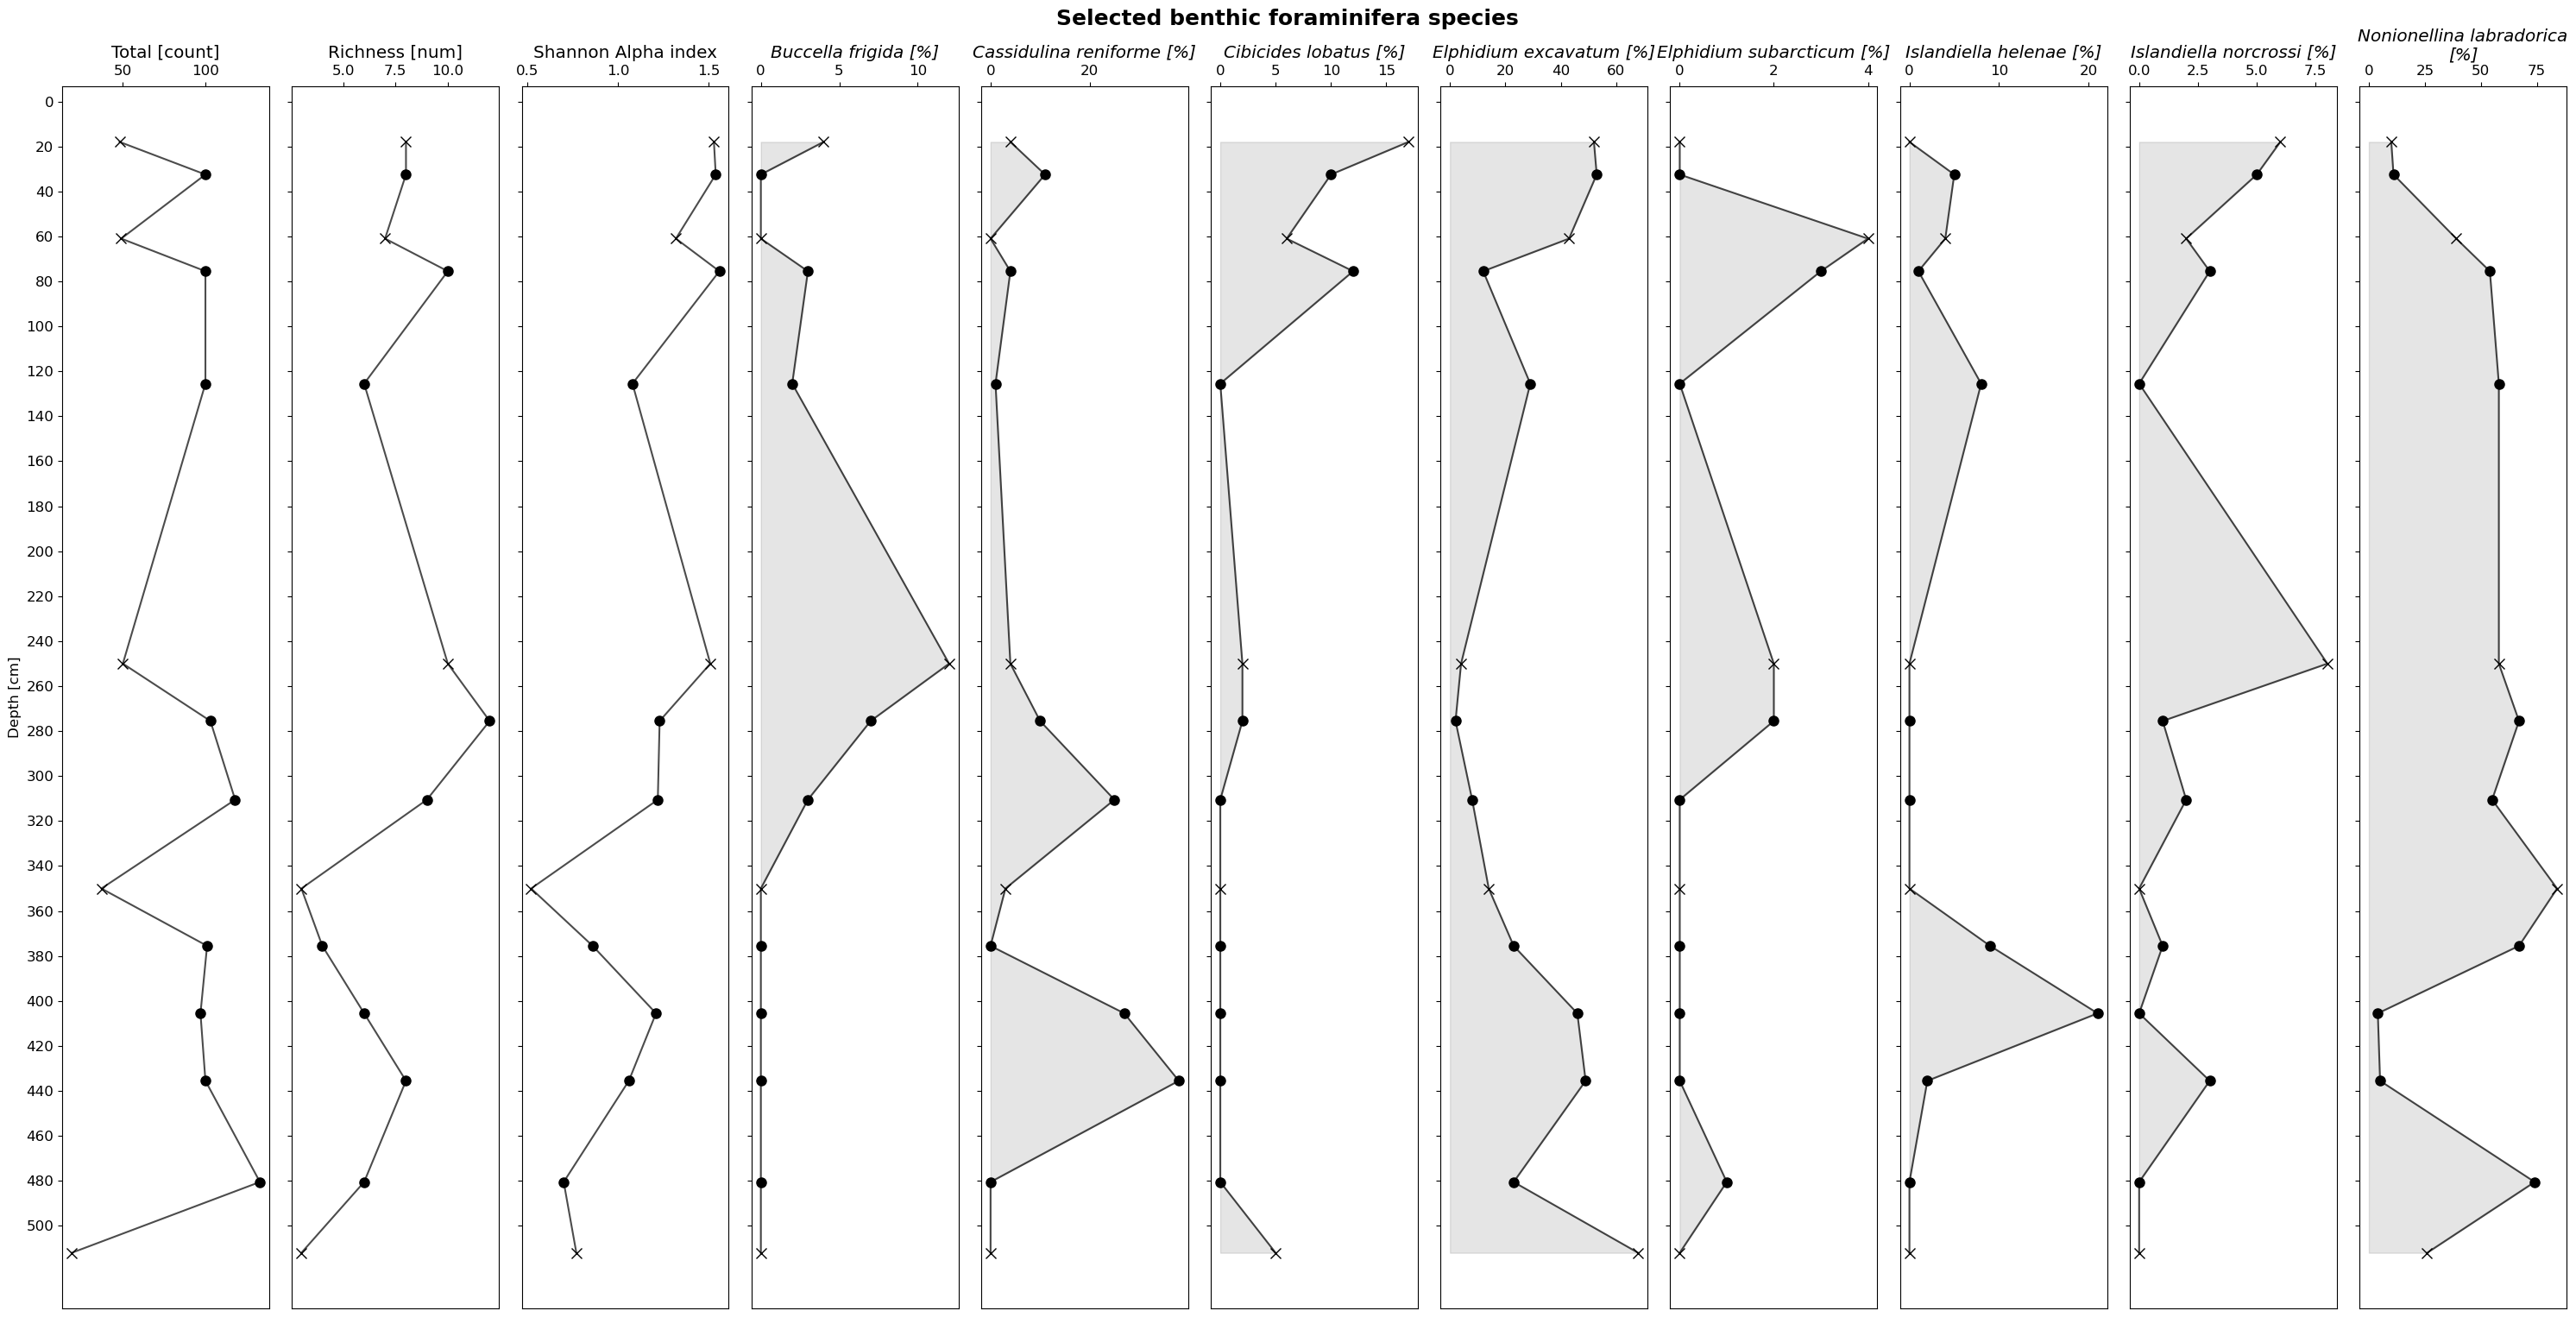

In [ ]:
msize = 8

fig, axs = plt.subplots(1, len(plt_species)+3, figsize = (30, 15), sharey = True)

plt.rcParams.update({'font.size': 12})

axs[0].plot(AllForams['Total'], AllForams['Depth'], linestyle='-', color='black', alpha = 0.7, zorder=1)
axs[0].plot(Forams_ship['Total'], Forams_ship['Depth'], 'x', markersize = msize, color = 'black', zorder=2)
axs[0].plot(Forams_lab['Total'], Forams_lab['Depth'], 'o', markersize = msize, color = 'black', zorder=2)
axs[0].set_title('Total [count]', wrap=True)
axs[0].invert_yaxis()
axs[0].set_ylabel('Depth [cm]')

axs[1].plot(AllForams['Richness'], AllForams['Depth'], linestyle='-', color='black', alpha = 0.7, zorder=1)
axs[1].plot(Forams_ship['Richness'], Forams_ship['Depth'], 'x', markersize = msize, color = 'black', zorder = 2)
axs[1].plot(Forams_lab['Richness'], Forams_lab['Depth'], 'o', markersize = msize, color = 'black', zorder = 2)
axs[1].set_title('Richness [num]', wrap=True)

axs[2].plot(AllForams['Shannon Alpha index'], AllForams['Depth'], linestyle='-', color='black', alpha = 0.7, zorder=1)
axs[2].plot(Forams_ship['Shannon Alpha index'], Forams_ship['Depth'], 'x', markersize = msize, color = 'black', zorder = 2)
axs[2].plot(Forams_lab['Shannon Alpha index'], Forams_lab['Depth'], 'o', markersize = msize, color = 'black', zorder = 2)
axs[2].set_title('Shannon Alpha index', wrap=True)

for i in range(len(plt_species)):
    axs[i+3].plot(AllForams[plt_species[i]], AllForams['Depth'], linestyle='-', color='black', alpha = 0.7, zorder=1)

    axs[i+3].fill_betweenx(AllForams['Depth'], AllForams[plt_species[i]], 0, color='black', alpha=0.1, zorder=1)
    
    axs[i+3].plot(Forams_ship[plt_species[i]], Forams_ship['Depth'], 'x', markersize = msize, color = 'black', zorder = 2)
    axs[i+3].plot(Forams_lab[plt_species[i]], Forams_lab['Depth'], 'o', markersize = msize, color = 'black', zorder = 2)
    axs[i+3].set_title(plt_species[i] + " [%]", wrap=True, style='italic')

axs[0].set_yticks(np.arange(0, 520, 20))


for i in range(len(plt_species)+3):
    axs[i].xaxis.tick_top()

"""
for ax in axs:
    ax.grid(
        True,
        linestyle='--',  # dashed lines
        color='gray',    # grid color
        alpha=0.5,       # transparency (0=invisible, 1=solid)
        which='both',    # major & minor ticks
        axis='both'      # both x and y axes
    )
"""


fig.text(0.50, 1, "Selected benthic foraminifera species", ha='center', va='bottom', fontsize=18, fontweight='bold')

plt.tight_layout()

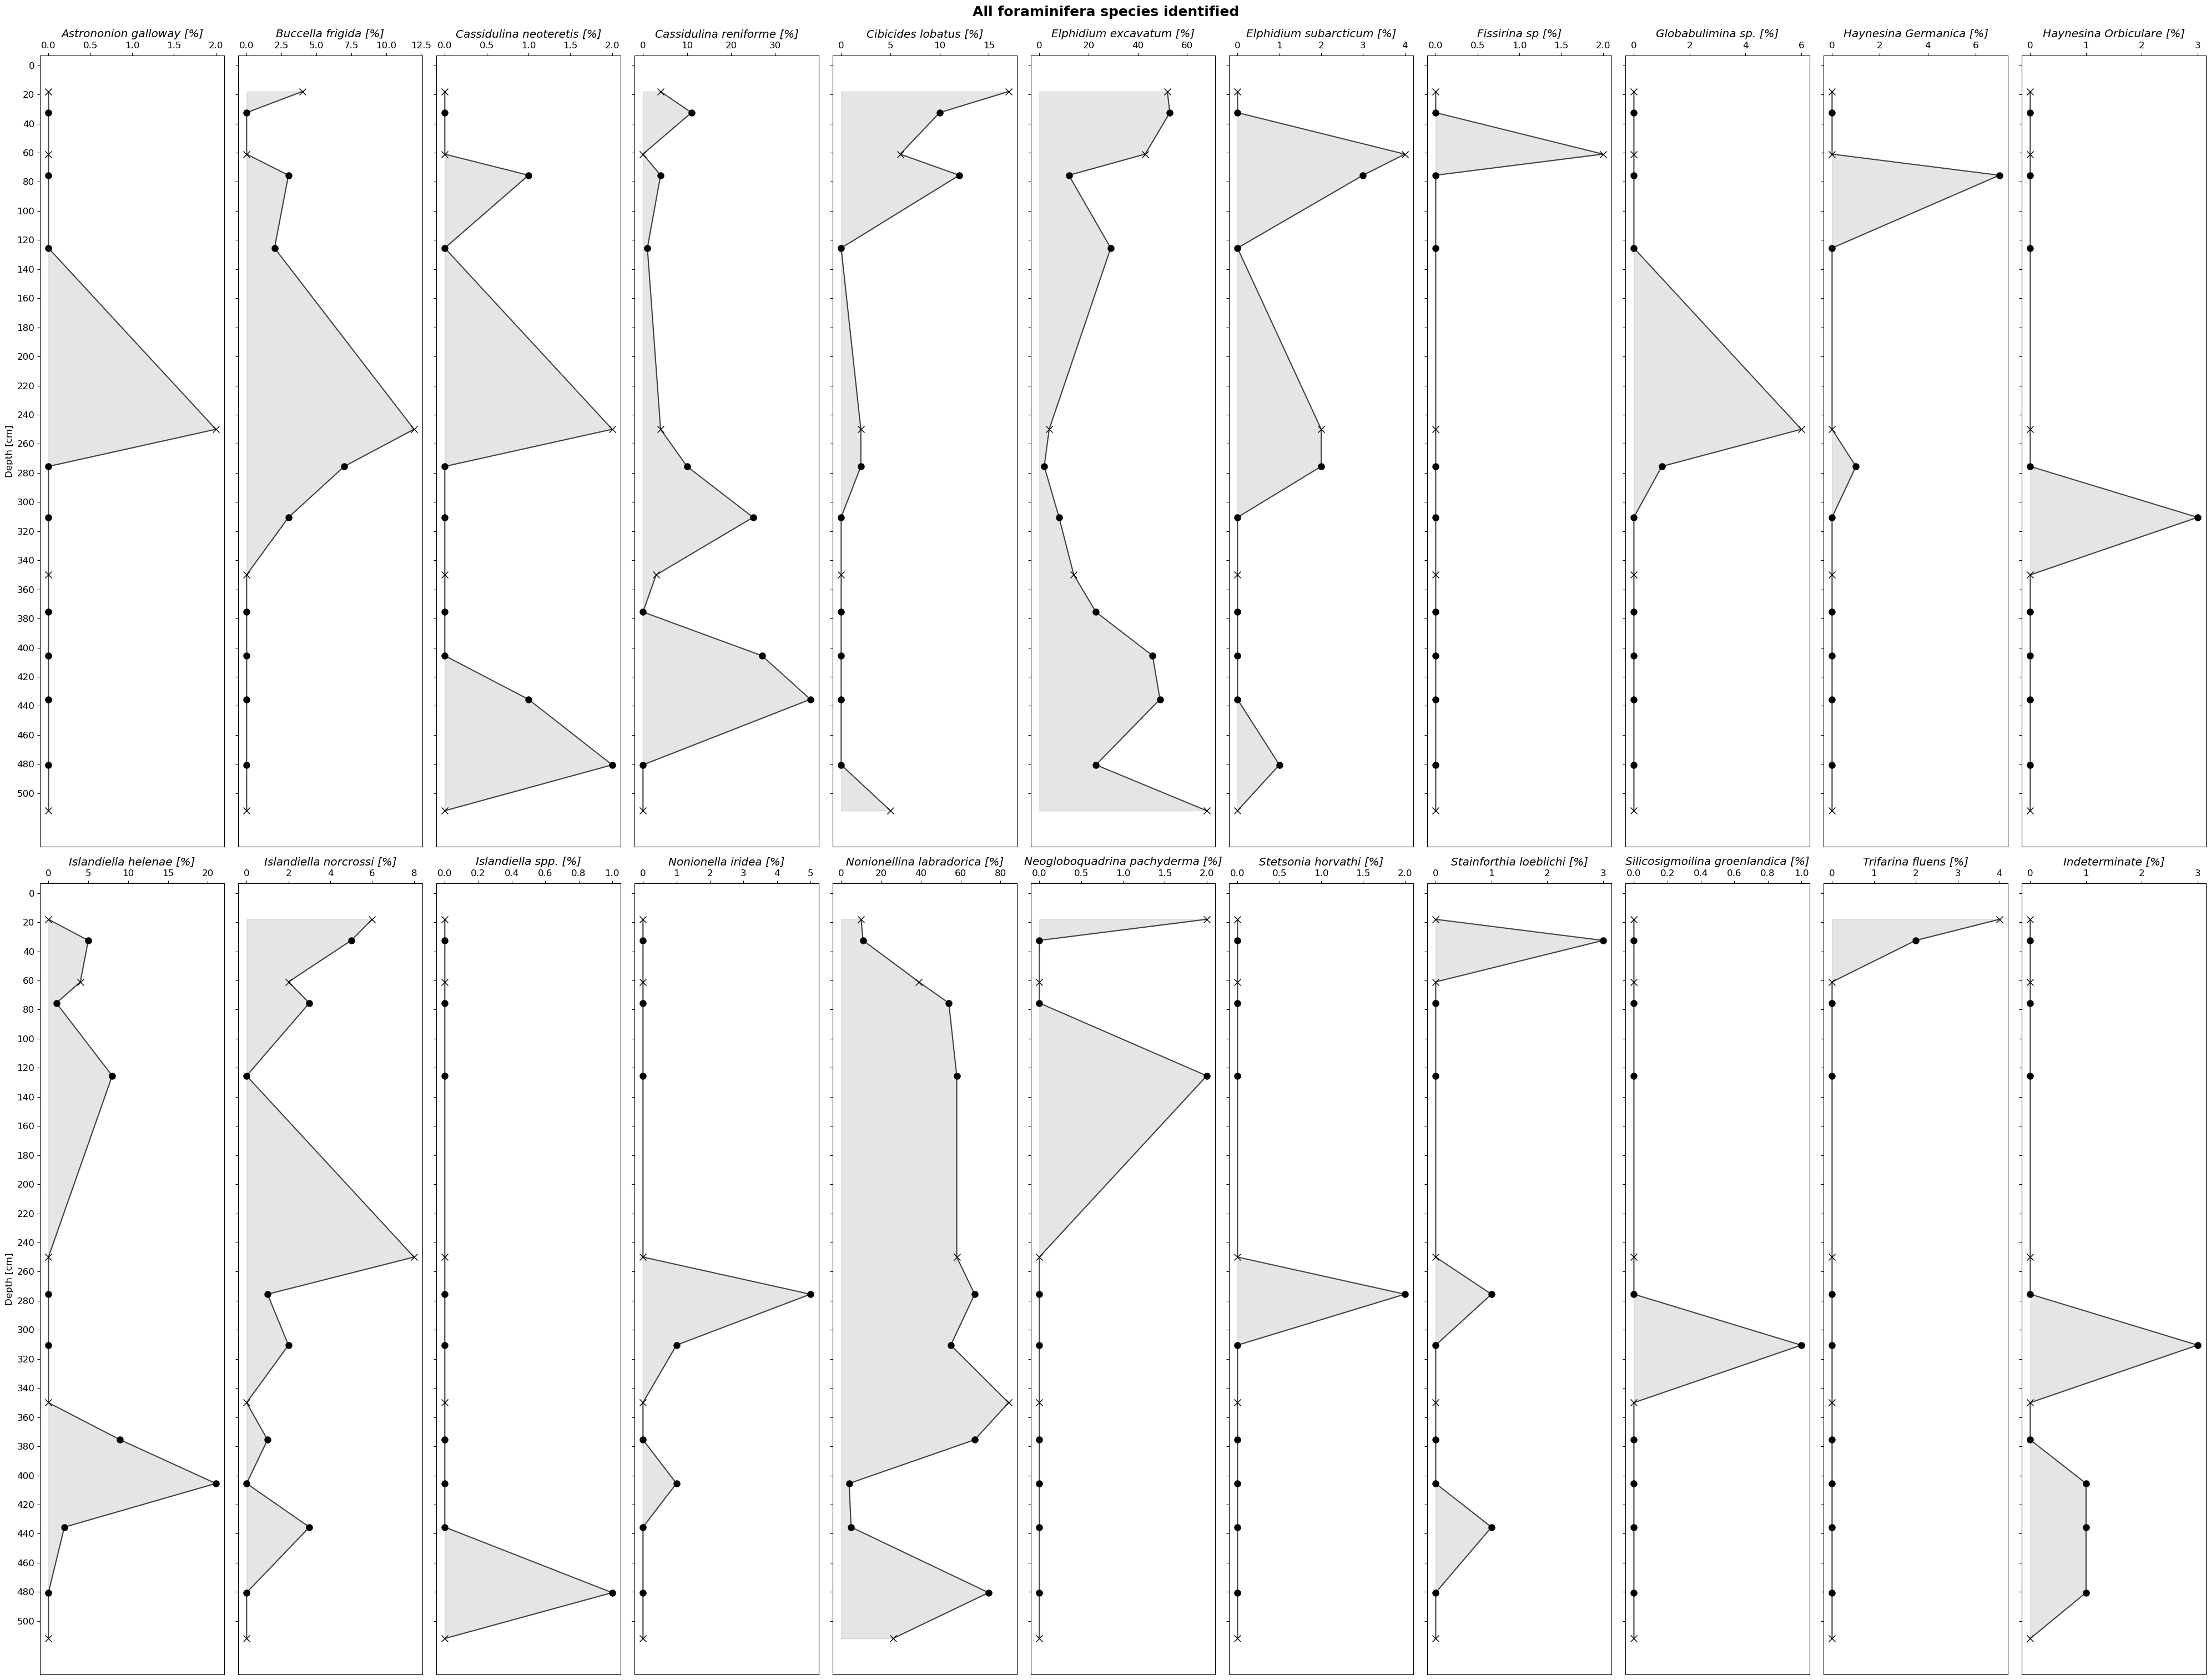

In [81]:
#appendix graph

msize = 8

fig, axs = plt.subplots(2, int(len(species)/2), figsize = (40, 30), sharey = True)

for i in range(len(species)):
    if i < len(species)/2:
        axs[0][i].plot(AllForams[species[i]], AllForams['Depth'], linestyle='-', color='black', alpha = 0.7, zorder=1)
        axs[0][i].fill_betweenx(AllForams['Depth'], AllForams[species[i]], 0, color='black', alpha=0.1, zorder=1)
        axs[0][i].plot(Forams_ship[species[i]], Forams_ship['Depth'], 'x', markersize = msize, color = 'black', zorder = 2)
        axs[0][i].plot(Forams_lab[species[i]], Forams_lab['Depth'], 'o', markersize = msize, color = 'black', zorder = 2)
        axs[0][i].set_title(species[i] + " [%]", wrap=True, style='italic')
        axs[0][i].xaxis.tick_top()
    
    else:
        axs[1][i-11].plot(AllForams[species[i]], AllForams['Depth'], linestyle='-', color='black', alpha = 0.7, zorder=1)
        axs[1][i-11].fill_betweenx(AllForams['Depth'], AllForams[species[i]], 0, color='black', alpha=0.1, zorder=1)
        axs[1][i-11].plot(Forams_ship[species[i]], Forams_ship['Depth'], 'x', markersize = msize, color = 'black', zorder = 2)
        axs[1][i-11].plot(Forams_lab[species[i]], Forams_lab['Depth'], 'o', markersize = msize, color = 'black', zorder = 2)
        axs[1][i-11].set_title(species[i] + " [%]", wrap=True, style='italic')
        axs[1][i-11].xaxis.tick_top()

axs[0][0].set_ylabel('Depth [cm]')
axs[1][0].set_ylabel('Depth [cm]')

axs[0][0].invert_yaxis()

axs[0][0].set_yticks(np.arange(0, 520, 20))

fig.text(0.50, 1, "All foraminifera species identified", ha='center', va='bottom', fontsize=18, fontweight='bold')



plt.tight_layout()

IRD Plots

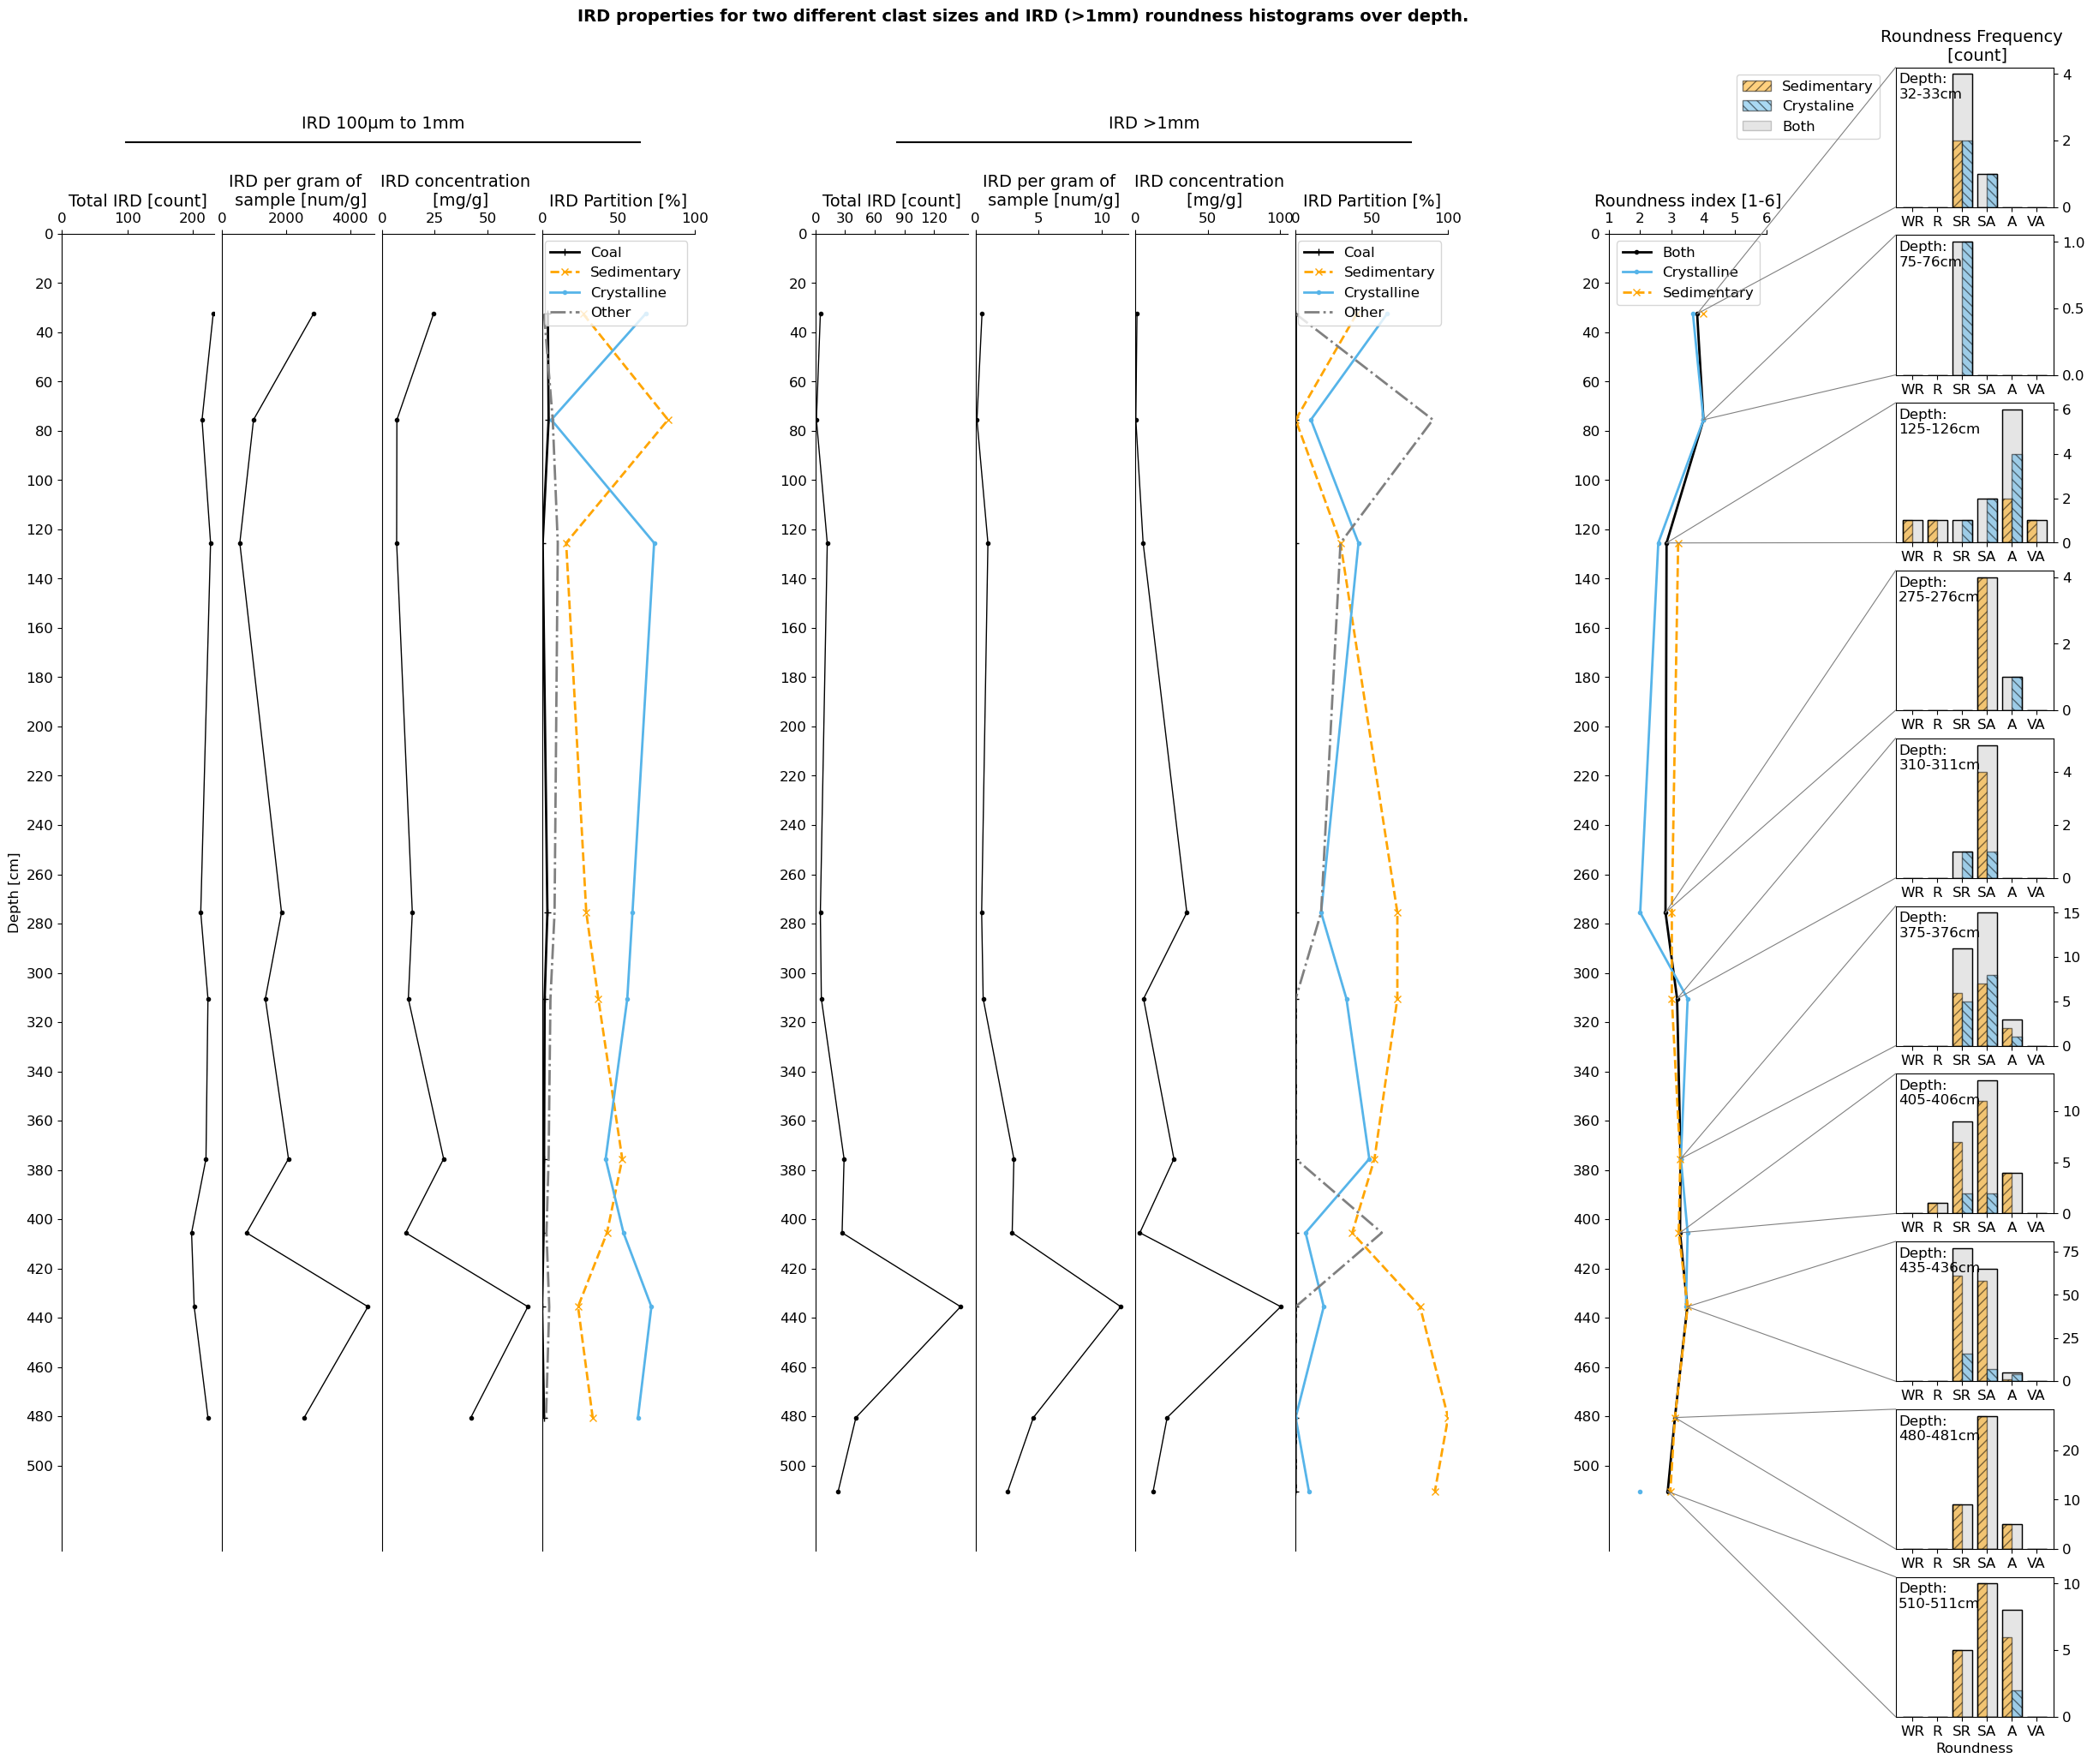

In [110]:

fig = plt.figure(figsize=(30, 25))

# ── Top-level: 20 rows × 7 “columns” (4 groups + 3 gaps)
# width_ratios = [grp1, gap1, grp2, gap2, grp3 (solo), gap3, grp4]
gs = gridspec.GridSpec(
    nrows=20, ncols=7,
    width_ratios=[4, 0.15, 4, 0.4, 1, 0.2, 1],
    figure=fig
)

axes = []

# ── Group 1: axes[0..3] (4 side-by-side), in rows 5–20 → shorter height
gs1 = gridspec.GridSpecFromSubplotSpec(
    nrows=1, ncols=4,
    subplot_spec=gs[2:18, 0],
    wspace=0.05
)
for i in range(4):
    if i == 0:
        ax = fig.add_subplot(gs1[0, i])
    else:
        ax = fig.add_subplot(gs1[0, i], sharey=axes[0])
    axes.append(ax)

# ── Group 2: axes[4..7] (4 side-by-side), in rows 5–20 → shorter height
gs2 = gridspec.GridSpecFromSubplotSpec(
    nrows=1, ncols=4,
    subplot_spec=gs[2:18, 2],
    wspace=0.05
)
for i in range(4):
    ax = fig.add_subplot(gs2[0, i], sharey=axes[0])
    axes.append(ax)

# ── Group 3 (solo): axes[8], in rows 5–20 → shorter height
ax = fig.add_subplot(gs[2:18, 4], sharey=axes[0])
axes.append(ax)

# ── Group 4: axes[9..18] (10 stacked rows), full 20-row height
gs4 = gridspec.GridSpecFromSubplotSpec(
    nrows=10, ncols=1,
    subplot_spec=gs[:, 6],
    hspace=0.2
)
for i in range(10):
    ax = fig.add_subplot(gs4[i, 0])
    axes.append(ax)

fig.text(0.50, 0.90, "IRD properties for two different clast sizes and IRD (>1mm) roundness histograms over depth. ", ha='center', va='bottom', fontsize=14, fontweight='bold')


fig.text(0.25, 0.85, "IRD 100µm to 1mm", ha='center', va='bottom', fontsize=14)
fig.lines.append(plt.Line2D([0.15, 0.35], [0.845, 0.845], transform=fig.transFigure, color='black'))

fig.text(0.55, 0.85, "IRD >1mm", ha='center', va='bottom', fontsize=14)
fig.lines.append(plt.Line2D([0.55-0.10, 0.55+0.10], [0.845, 0.845], transform=fig.transFigure, color='black'))

# axes[0], PLOT COUNT  1-100um
axes[0].plot(New_IRD_100um["total IRD"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k', label = '100um to 1mm')
axes[0].set_title('Total IRD [count]', loc='center', fontsize = 14)
axes[0].xaxis.tick_top()
axes[0].invert_yaxis()

axes[1].spines['bottom'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# axes[1], PLOT [count/gram]  1-100um
axes[1].plot(New_IRD_100um["IRD grains per gram of sample [num / g]"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[1].set_title('IRD per gram of \n sample [num/g]', loc='center', fontsize = 14)
axes[1].xaxis.tick_top()

axes[1].spines['bottom'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].tick_params(
    axis='y',        # apply to the y–axis
    which='both',    # major and minor ticks
    left=False,      # no left ticks
    labelleft=False  # no left tick‐labels
)

# axes[2], PLOT [mg/gram]  1-100um
axes[2].plot(New_IRD_100um["ConcentrationIRD [mg/g]"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[2].set_title('IRD concentration \n [mg/g]', loc='center', fontsize = 14)
axes[2].xaxis.tick_top()



# axes[3], PLOT OTHER, CRYS, SED, COAL%  1-100um
axes[3].plot(New_IRD_100um["Coal%"], New_IRD_100um['Depth'], linewidth = 2, marker = "+", color = 'black', label = 'Coal')
axes[3].plot(New_IRD_100um["Sedimentary%"], New_IRD_100um['Depth'], linewidth = 2, marker = "x", linestyle = '--', color = 'Orange', label = 'Sedimentary')
axes[3].plot(New_IRD_100um["Crystalline%"], New_IRD_100um['Depth'], linewidth = 2, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[3].plot(New_IRD_100um["Other%"], New_IRD_100um['Depth'], linewidth = 2, linestyle = "-.", color = 'grey', label = 'Other')
axes[3].set_title('IRD Partition [%]', loc='center', fontsize = 14)
axes[3].set_xlim(0, 100)
axes[3].legend(loc = 'upper right')
axes[3].xaxis.tick_top()

# axes[4], PLOT COUNT  1-100um
axes[4].plot(New_IRD_1mm["total IRD"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k', label = '100um to 1mm')
axes[4].set_title('Total IRD [count]', loc='center', fontsize = 14)
axes[4].xaxis.tick_top()
axes[4].set_xticks(np.arange(0, 150, 30))


# axes[5], PLOT [count/gram]  1-100um
axes[5].plot(New_IRD_1mm["IRD grains per gram of sample [num / g]"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[5].set_title('IRD per gram of \n sample [num/g]', loc='center', fontsize = 14)
axes[5].xaxis.tick_top()

# axes[6], PLOT [mg/gram]  1-100um
axes[6].plot(New_IRD_1mm["ConcentrationIRD [mg/g]"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[6].set_title('IRD concentration \n [mg/g]', loc='center', fontsize = 14)
axes[6].xaxis.tick_top()

# axes[7], PLOT OTHER, CRYS, SED, COAL%  1-100um
axes[7].plot(New_IRD_1mm["Coal%"], New_IRD_1mm['Depth'], linewidth = 2, marker = "+", color = 'black', label = 'Coal')
axes[7].plot(New_IRD_1mm["Sedimentary%"], New_IRD_1mm['Depth'], linewidth = 2, marker = "x", linestyle = '--', color = 'Orange', label = 'Sedimentary')
axes[7].plot(New_IRD_1mm["Crystalline%"], New_IRD_1mm['Depth'], linewidth = 2, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[7].plot(New_IRD_1mm["Other%"], New_IRD_1mm['Depth'], linewidth = 2, linestyle = "-.", color = 'grey', label = 'Other')
axes[7].set_title('IRD Partition [%]', loc='center', fontsize = 14)
axes[7].set_xlim(0, 100)
axes[7].legend(loc = 'upper right')
axes[7].xaxis.tick_top()


# axes[8], PLOT RNDS INDEX LATER AFTER LOOP! 


# VERTICAL PLOTS (HISTOTGRAMS)

# Define roundness categories in desired order
roundness_order = ['WR', 'R', 'SR', 'SA', 'A', 'VA']
samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sample_depths = ["Depth:\n32-33cm", "Depth:\n75-76cm", "Depth:\n125-126cm", "Depth:\n275-276cm", "Depth:\n310-311cm", "Depth:\n375-376cm", "Depth:\n405-406cm", "Depth:\n435-436cm", "Depth:\n480-481cm", "Depth:\n510-511cm"]

offset = num_cols - 2


depths_plot = [32.5, 75.5, 125.5, 275.5, 310.5, 375.5, 405.5, 435.5, 480.5, 510.5]
list_R_ind_A = []
list_R_ind_C = []
list_R_ind_S = []

for i in samples:
    roundness_temp = RoundnessIRD[RoundnessIRD['Sample'] == i]
    roundnessC_temp = roundness_temp[roundness_temp['Type'] == 'C']
    roundnessS_temp = roundness_temp[roundness_temp['Type'] == 'S']

    # Count occurrences
    count_A = roundness_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)
    count_C = roundnessC_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)
    count_S = roundnessS_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)

    R_ind_A = roundness_temp['Value'].mean()
    R_ind_C = roundnessC_temp['Value'].mean()
    R_ind_S = roundnessS_temp['Value'].mean()

    list_R_ind_A.append(R_ind_A)
    list_R_ind_C.append(R_ind_C)
    list_R_ind_S.append(R_ind_S)

    x = np.arange(len(roundness_order))  # X locations for the groups
    width = 0.40  # Width of each bar

    # Plot bars with offset positions
    axes[i+offset].bar(x - 0.5*width,   count_S.values, width, label='Sedimentary', color='Orange', edgecolor='black', hatch = '///', alpha=0.5, zorder = 2)
    axes[i+offset].bar(x + 0.5*width,   count_C.values, width, label='Crystaline', color='#56B4E9', edgecolor='black', hatch = '\\\\\\', alpha=0.5, zorder = 3)

    axes[i+offset].bar(x, count_A.values, 2*width, facecolor='none', edgecolor='black', zorder = 4)

    axes[i+offset].bar(x, count_A.values, 2*width, label='Both', color='grey', edgecolor='black', alpha=0.2, zorder = 1)

    axes[i+offset].text(0.02, 0.78, sample_depths[i-1], transform=axes[i+offset].transAxes)

    axes[i+offset].set_xticks(range(len(roundness_order)))
    axes[i+offset].set_xticklabels(roundness_order)

    axes[i+offset].yaxis.tick_right()


axes[9].legend(bbox_to_anchor=(-1.05, 1), loc='upper left')


# Formatting
axes[offset+1].set_title("Roundness Frequency \n [count]", fontsize=14)
axes[offset+10].set_xlabel("Roundness", fontsize=12)
#axes[4].legend()

# axes[8], PLOT RNDS INDEX
axes[8].plot(list_R_ind_A, depths_plot, linewidth = 2, marker = ".", linestyle = '-', color = 'k', label = 'Both')
axes[8].plot(list_R_ind_C, depths_plot, linewidth = 2, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[8].plot(list_R_ind_S, depths_plot, linewidth = 2, marker = "x", linestyle = '--', color = 'Orange', label = 'Sedimentary')

axes[8].set_title('Roundness index [1-6]', loc='center', fontsize = 14)
axes[8].xaxis.tick_top()
axes[8].legend()

axes[0].set_yticks(np.arange(0, 520, 20))
axes[0].set_ylabel('Depth [cm]')


axes[0].spines['bottom'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[4].spines['bottom'].set_visible(False)
axes[4].spines['right'].set_visible(False)

axes[8].spines['bottom'].set_visible(False)
axes[8].spines['right'].set_visible(False)


axes[0].set_xlim(left = 0)
axes[1].set_xlim(left = 0)
axes[2].set_xlim(left = 0)
axes[4].set_xlim(left = 0)
axes[5].set_xlim(left = 0)
axes[6].set_xlim(left = 0)

axes[8].set_xlim(1, 6)
axes[8].set_xticks(np.arange(1, 7, 1))



hide_idx = list(range(1, 4)) + list(range(5, 8))  # group1:1–3, group2:5–7
for i in hide_idx:
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )


# DRAWS LINES CONNECTING HISTOGRAMS TO DATA POINTS
x_data = list_R_ind_A
y_data = depths_plot
base_ax = axes[8]   

for i in range(10):

    zoom_ax = axes[i + 9]   # your small, stacked axes
    xi, yi   = x_data[i], y_data[i]

    # 1) corner positions of the small axes in FIGURE coords
    bbox = zoom_ax.get_position()
    tl = (bbox.x0, bbox.y1)
    bl = (bbox.x0, bbox.y0)

    # 2) data point in DISPLAY coords, then to FIGURE coords
    disp_pt = base_ax.transData.transform((xi, yi))
    fig_pt  = fig.transFigure.inverted().transform(disp_pt)

    # 3) draw two little “zoom” lines
    for corner in (tl, bl):
        ln = Line2D([corner[0], fig_pt[0]],
                    [corner[1], fig_pt[1]],
                    transform=fig.transFigure,
                    linewidth=0.8, color='gray')
        fig.add_artist(ln)

plt.show()

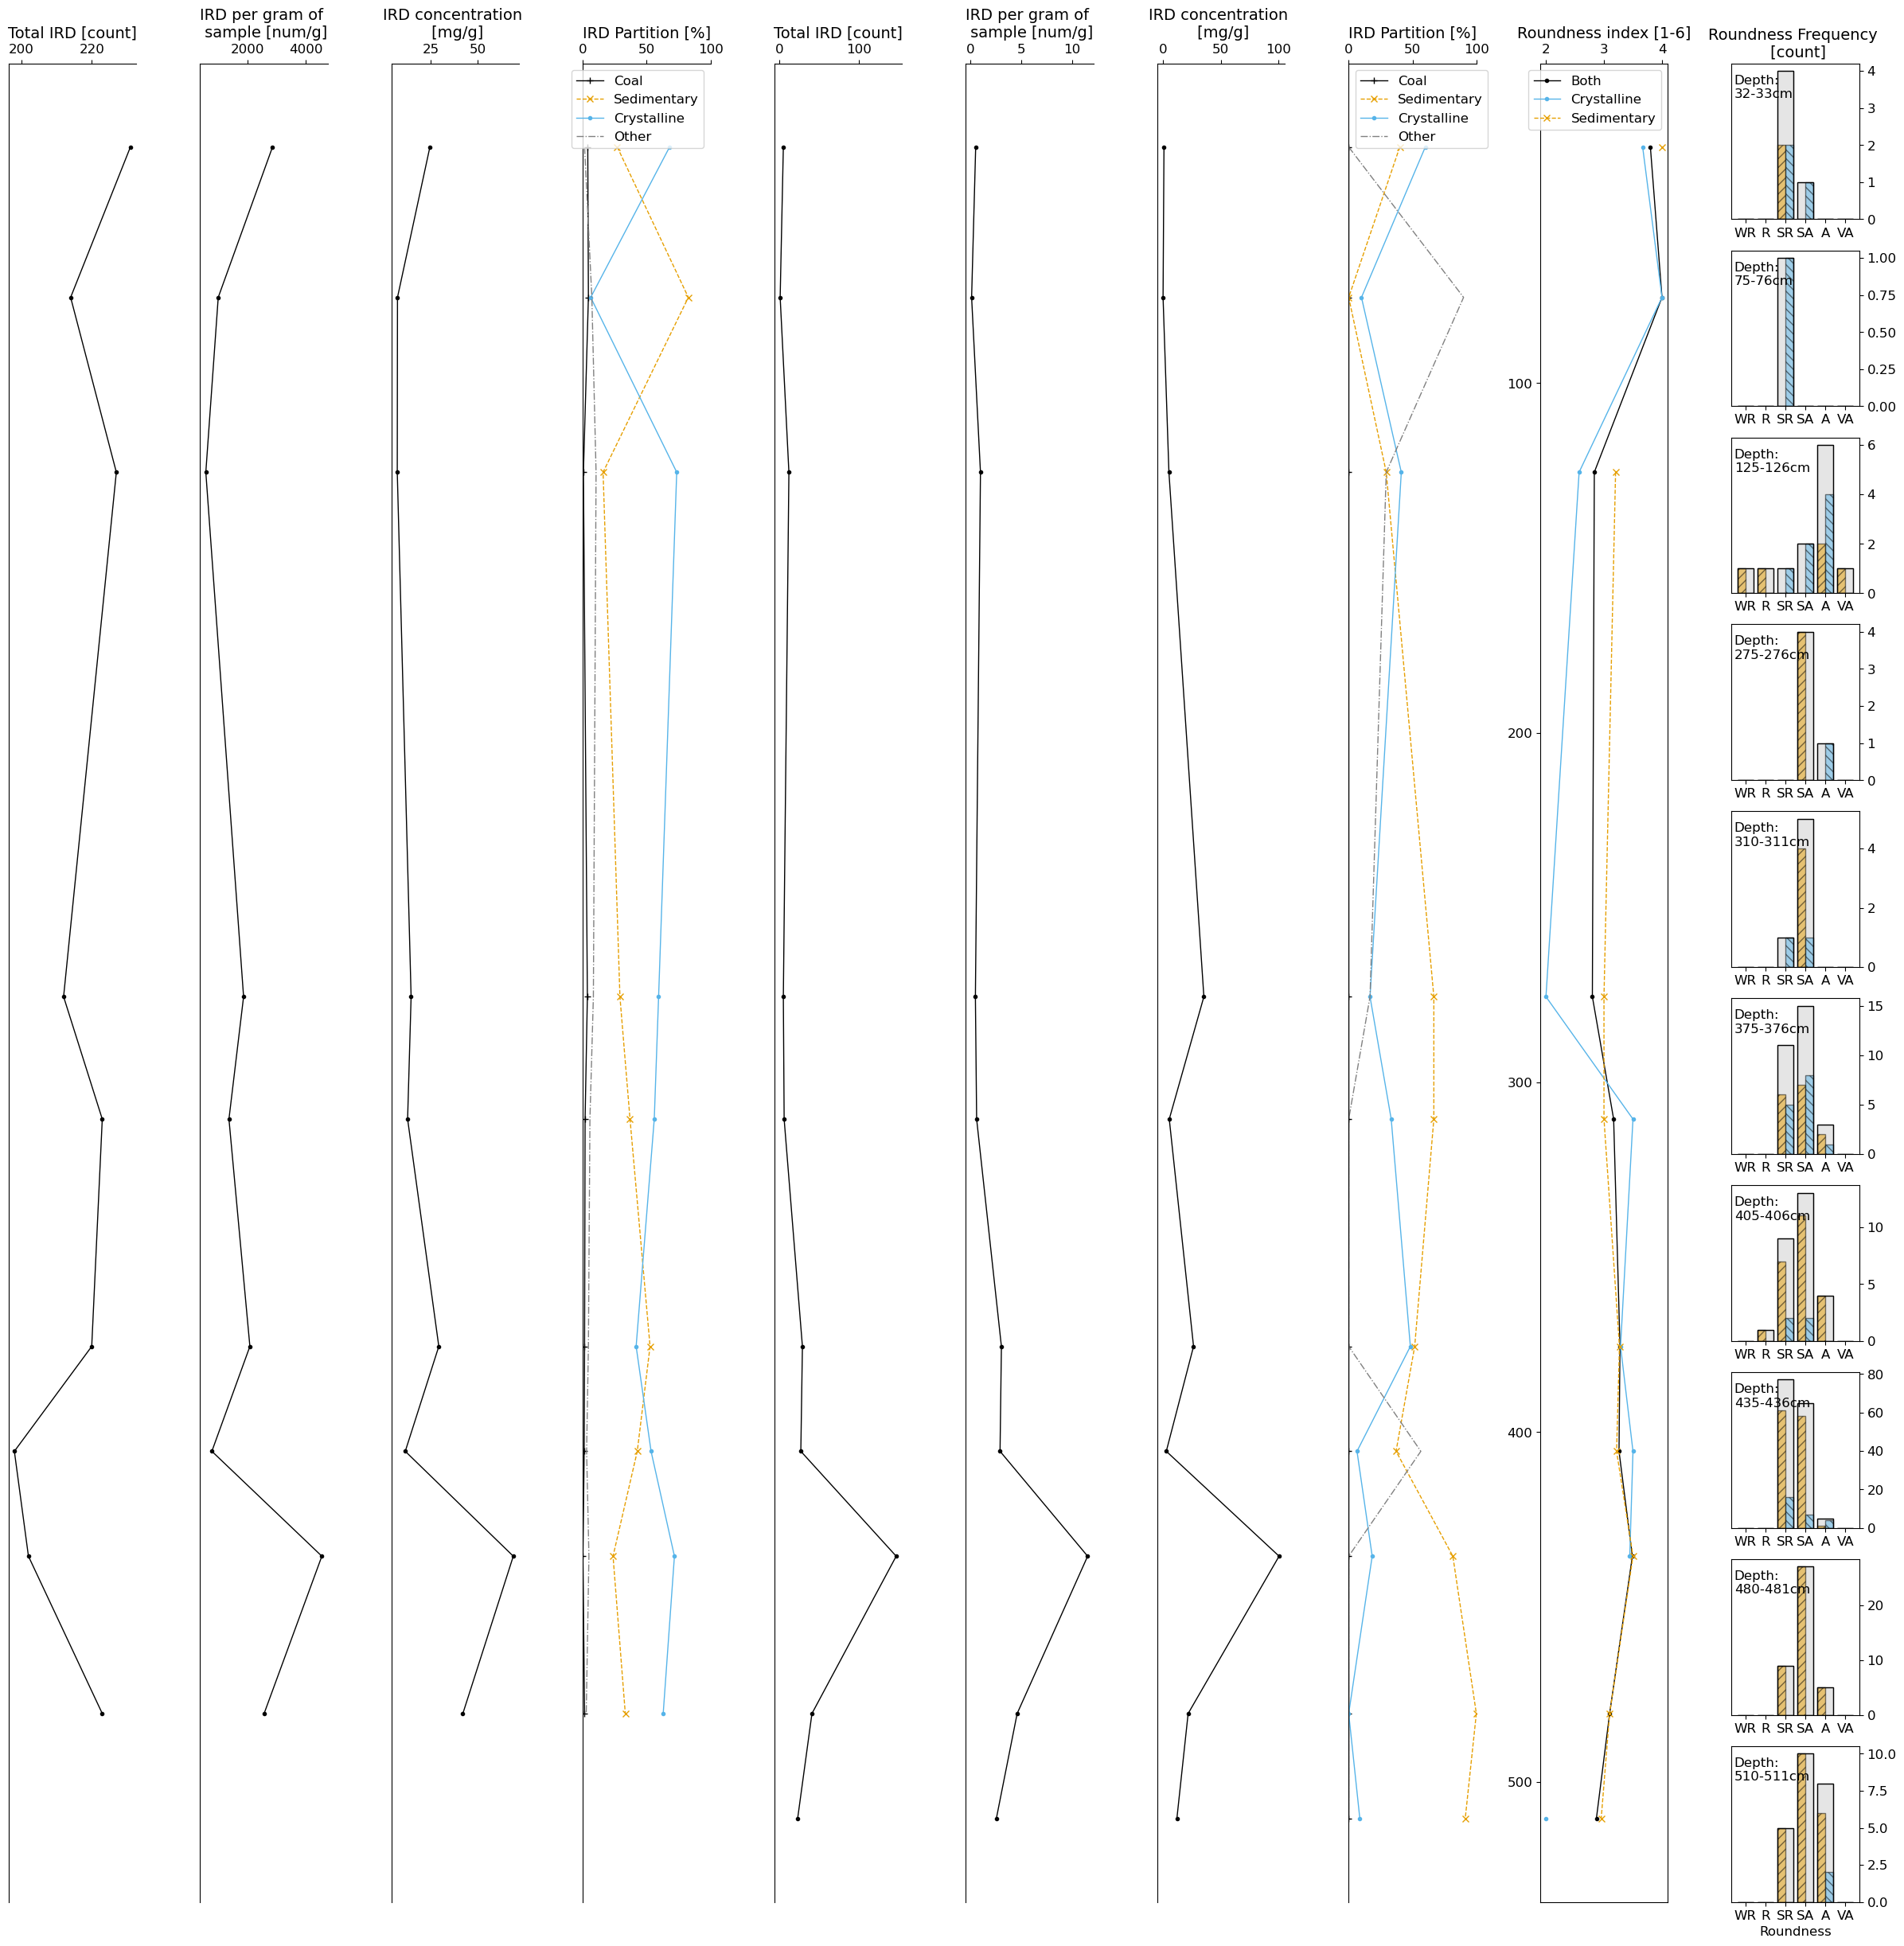

In [107]:
fig = plt.figure(figsize=(30, 30))

num_cols = 10

# Define a 10xnum_cols grid
gs = gridspec.GridSpec(nrows=10, ncols= num_cols, wspace=0.5, hspace=0.2)

axes = []

# First numcols-1 axes: span all 10 rows in their respective columns
for col in range(num_cols-1):
    if col == 0:
        ax = fig.add_subplot(gs[:, col])  # reference axis
    else:
        ax = fig.add_subplot(gs[:, col], sharey=axes[0])
   # ax = fig.add_subplot(gs[:, col])  # span all rows
    ax.set_title(f'Col {col+1}')
    axes.append(ax)

# Last column: 10 separate subplots, one per row
for row in range(10):
    ax = fig.add_subplot(gs[row, num_cols-1])  # individual row in last column
   # ax.set_title(f'Row {row+1}', fontsize=8)
    axes.append(ax)


# axes[0], PLOT COUNT  1-100um
axes[0].plot(New_IRD_100um["total IRD"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k', label = '100um to 1mm')
axes[0].set_title('Total IRD [count]', loc='center', fontsize = 14)
axes[0].xaxis.tick_top()
axes[0].invert_yaxis()

axes[1].spines['bottom'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# axes[1], PLOT [count/gram]  1-100um
axes[1].plot(New_IRD_100um["IRD grains per gram of sample [num / g]"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[1].set_title('IRD per gram of \n sample [num/g]', loc='center', fontsize = 14)
axes[1].xaxis.tick_top()

axes[1].spines['bottom'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].tick_params(
    axis='y',        # apply to the y–axis
    which='both',    # major and minor ticks
    left=False,      # no left ticks
    labelleft=False  # no left tick‐labels
)

# axes[2], PLOT [mg/gram]  1-100um
axes[2].plot(New_IRD_100um["ConcentrationIRD [mg/g]"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[2].set_title('IRD concentration \n [mg/g]', loc='center', fontsize = 14)
axes[2].xaxis.tick_top()





# axes[3], PLOT OTHER, CRYS, SED, COAL%  1-100um
axes[3].plot(New_IRD_100um["Coal%"], New_IRD_100um['Depth'], linewidth = 1, marker = "+", color = 'black', label = 'Coal')
axes[3].plot(New_IRD_100um["Sedimentary%"], New_IRD_100um['Depth'], linewidth = 1, marker = "x", linestyle = '--', color = '#E69F00', label = 'Sedimentary')
axes[3].plot(New_IRD_100um["Crystalline%"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[3].plot(New_IRD_100um["Other%"], New_IRD_100um['Depth'], linewidth = 1, linestyle = "-.", color = 'grey', label = 'Other')
axes[3].set_title('IRD Partition [%]', loc='center', fontsize = 14)
axes[3].set_xlim(0, 100)
axes[3].legend(loc = 'upper right')
axes[3].xaxis.tick_top()

# axes[4], PLOT COUNT  1-100um
axes[4].plot(New_IRD_1mm["total IRD"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k', label = '100um to 1mm')
axes[4].set_title('Total IRD [count]', loc='center', fontsize = 14)
axes[4].xaxis.tick_top()

# axes[5], PLOT [count/gram]  1-100um
axes[5].plot(New_IRD_1mm["IRD grains per gram of sample [num / g]"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[5].set_title('IRD per gram of \n sample [num/g]', loc='center', fontsize = 14)
axes[5].xaxis.tick_top()

# axes[6], PLOT [mg/gram]  1-100um
axes[6].plot(New_IRD_1mm["ConcentrationIRD [mg/g]"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[6].set_title('IRD concentration \n [mg/g]', loc='center', fontsize = 14)
axes[6].xaxis.tick_top()

# axes[7], PLOT OTHER, CRYS, SED, COAL%  1-100um
axes[7].plot(New_IRD_1mm["Coal%"], New_IRD_1mm['Depth'], linewidth = 1, marker = "+", color = 'black', label = 'Coal')
axes[7].plot(New_IRD_1mm["Sedimentary%"], New_IRD_1mm['Depth'], linewidth = 1, marker = "x", linestyle = '--', color = '#E69F00', label = 'Sedimentary')
axes[7].plot(New_IRD_1mm["Crystalline%"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[7].plot(New_IRD_1mm["Other%"], New_IRD_1mm['Depth'], linewidth = 1, linestyle = "-.", color = 'grey', label = 'Other')
axes[7].set_title('IRD Partition [%]', loc='center', fontsize = 14)
axes[7].set_xlim(0, 100)
axes[7].legend()
axes[7].xaxis.tick_top()


# axes[8], PLOT RNDS INDEX LATER AFTER LOOP! 


# VERTICAL PLOTS (HISTOTGRAMS)

# Define roundness categories in desired order
roundness_order = ['WR', 'R', 'SR', 'SA', 'A', 'VA']
samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sample_depths = ["Depth:\n32-33cm", "Depth:\n75-76cm", "Depth:\n125-126cm", "Depth:\n275-276cm", "Depth:\n310-311cm", "Depth:\n375-376cm", "Depth:\n405-406cm", "Depth:\n435-436cm", "Depth:\n480-481cm", "Depth:\n510-511cm"]

offset = num_cols - 2


depths_plot = [32.5, 75.5, 125.5, 275.5, 310.5, 375.5, 405.5, 435.5, 480.5, 510.5]
list_R_ind_A = []
list_R_ind_C = []
list_R_ind_S = []

for i in samples:
    roundness_temp = RoundnessIRD[RoundnessIRD['Sample'] == i]
    roundnessC_temp = roundness_temp[roundness_temp['Type'] == 'C']
    roundnessS_temp = roundness_temp[roundness_temp['Type'] == 'S']

    # Count occurrences
    count_A = roundness_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)
    count_C = roundnessC_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)
    count_S = roundnessS_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)

    R_ind_A = roundness_temp['Value'].mean()
    R_ind_C = roundnessC_temp['Value'].mean()
    R_ind_S = roundnessS_temp['Value'].mean()

    list_R_ind_A.append(R_ind_A)
    list_R_ind_C.append(R_ind_C)
    list_R_ind_S.append(R_ind_S)

    x = np.arange(len(roundness_order))  # X locations for the groups
    width = 0.40  # Width of each bar

    # Plot bars with offset positions
    axes[i+offset].bar(x - 0.5*width,   count_S.values, width, label='Sedimentary', color='#E69F00', edgecolor='black', hatch = '///', alpha=0.5, zorder = 2)
    axes[i+offset].bar(x + 0.5*width,   count_C.values, width, label='Crystaline', color='#56B4E9', edgecolor='black', hatch = '\\\\\\', alpha=0.5, zorder = 3)

    axes[i+offset].bar(x, count_A.values, 2*width, facecolor='none', edgecolor='black', zorder = 4)

    axes[i+offset].bar(x, count_A.values, 2*width, label='Both', color='grey', edgecolor='black', alpha=0.2, zorder = 1)

    axes[i+offset].text(0.02, 0.78, sample_depths[i-1], transform=axes[i+offset].transAxes)

    axes[i+offset].set_xticks(range(len(roundness_order)))
    axes[i+offset].set_xticklabels(roundness_order)

    axes[i+offset].yaxis.tick_right()

# Formatting
axes[offset+1].set_title("Roundness Frequency \n [count]", fontsize=14)
axes[offset+10].set_xlabel("Roundness", fontsize=12)
#axes[4].legend()

# axes[8], PLOT RNDS INDEX
axes[8].plot(list_R_ind_A, depths_plot, linewidth = 1, marker = ".", linestyle = '-', color = 'k', label = 'Both')
axes[8].plot(list_R_ind_C, depths_plot, linewidth = 1, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[8].plot(list_R_ind_S, depths_plot, linewidth = 1, marker = "x", linestyle = '--', color = '#E69F00', label = 'Sedimentary')

axes[8].set_title('Roundness index [1-6]', loc='center', fontsize = 14)
axes[8].xaxis.tick_top()
axes[8].legend()


for i in range(8):
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )

plt.show()

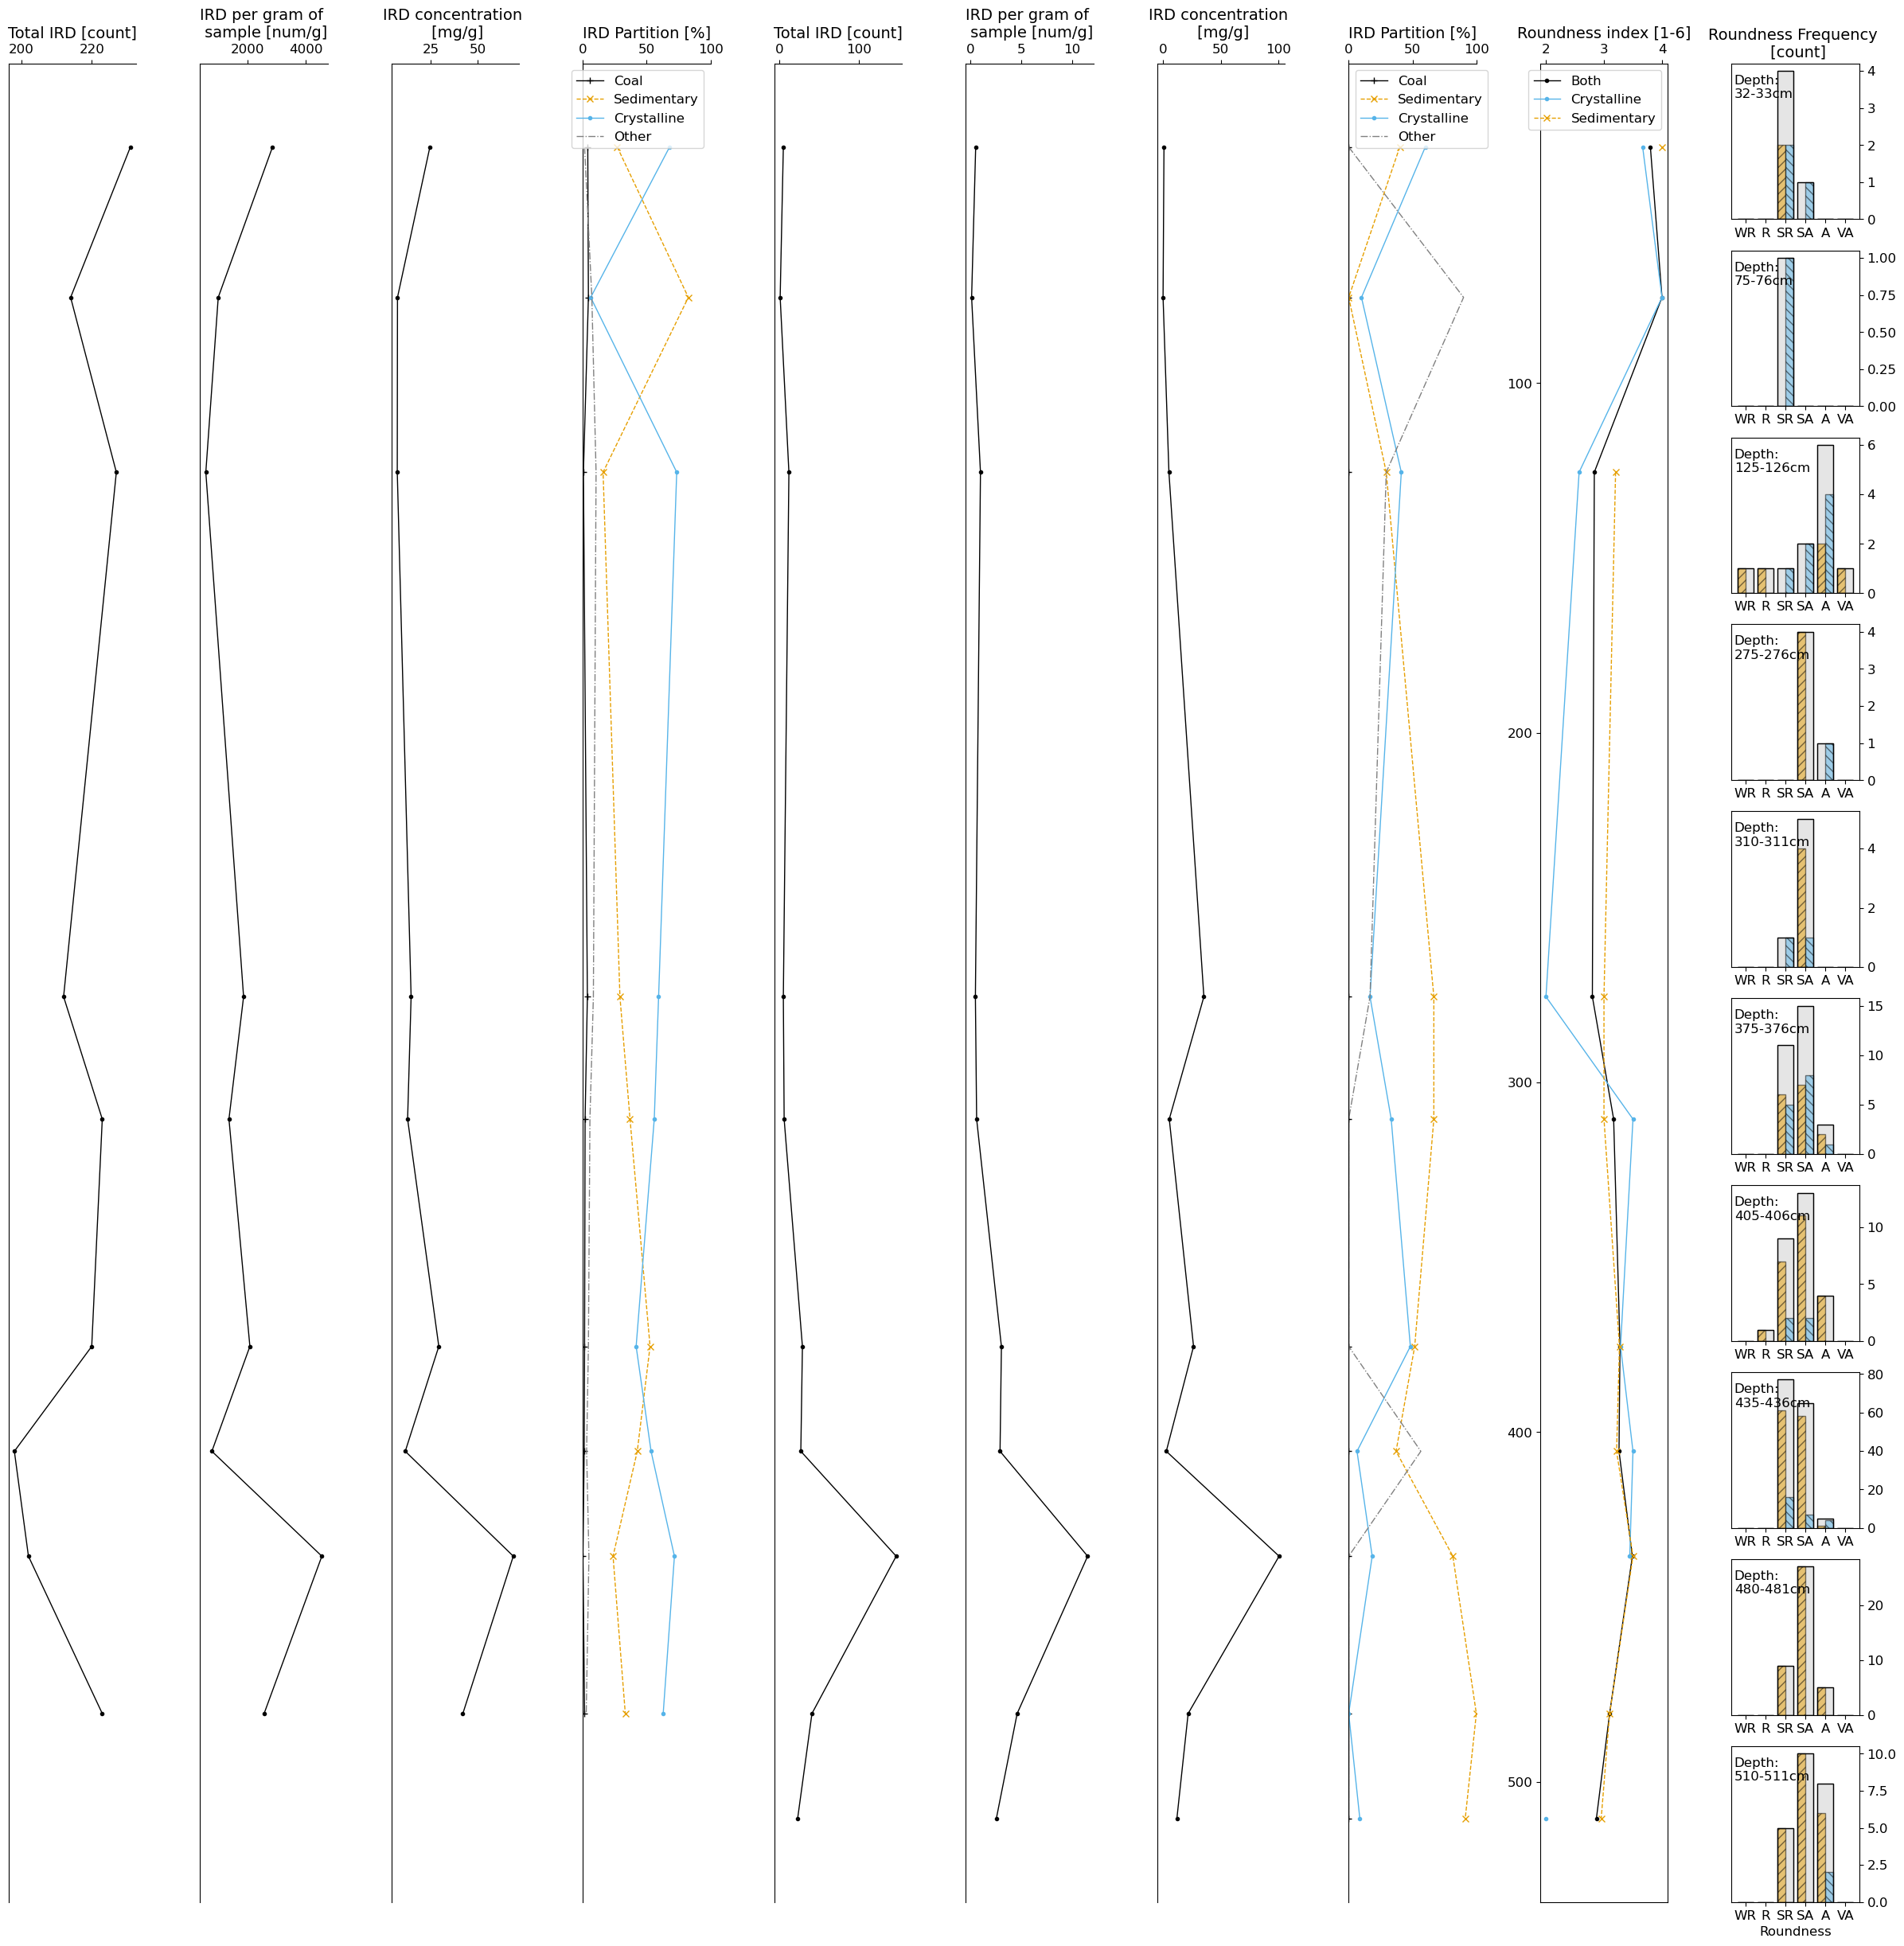

In [108]:
fig = plt.figure(figsize=(30, 30))

num_cols = 10

# Define a 10xnum_cols grid
gs = gridspec.GridSpec(nrows=10, ncols= num_cols, wspace=0.5, hspace=0.2)

axes = []

# First numcols-1 axes: span all 10 rows in their respective columns
for col in range(num_cols-1):
    if col == 0:
        ax = fig.add_subplot(gs[:, col])  # reference axis
    else:
        ax = fig.add_subplot(gs[:, col], sharey=axes[0])
   # ax = fig.add_subplot(gs[:, col])  # span all rows
    ax.set_title(f'Col {col+1}')
    axes.append(ax)

# Last column: 10 separate subplots, one per row
for row in range(10):
    ax = fig.add_subplot(gs[row, num_cols-1])  # individual row in last column
   # ax.set_title(f'Row {row+1}', fontsize=8)
    axes.append(ax)


# axes[0], PLOT COUNT  1-100um
axes[0].plot(New_IRD_100um["total IRD"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k', label = '100um to 1mm')
axes[0].set_title('Total IRD [count]', loc='center', fontsize = 14)
axes[0].xaxis.tick_top()
axes[0].invert_yaxis()

axes[1].spines['bottom'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# axes[1], PLOT [count/gram]  1-100um
axes[1].plot(New_IRD_100um["IRD grains per gram of sample [num / g]"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[1].set_title('IRD per gram of \n sample [num/g]', loc='center', fontsize = 14)
axes[1].xaxis.tick_top()

axes[1].spines['bottom'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].tick_params(
    axis='y',        # apply to the y–axis
    which='both',    # major and minor ticks
    left=False,      # no left ticks
    labelleft=False  # no left tick‐labels
)

# axes[2], PLOT [mg/gram]  1-100um
axes[2].plot(New_IRD_100um["ConcentrationIRD [mg/g]"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[2].set_title('IRD concentration \n [mg/g]', loc='center', fontsize = 14)
axes[2].xaxis.tick_top()





# axes[3], PLOT OTHER, CRYS, SED, COAL%  1-100um
axes[3].plot(New_IRD_100um["Coal%"], New_IRD_100um['Depth'], linewidth = 1, marker = "+", color = 'black', label = 'Coal')
axes[3].plot(New_IRD_100um["Sedimentary%"], New_IRD_100um['Depth'], linewidth = 1, marker = "x", linestyle = '--', color = '#E69F00', label = 'Sedimentary')
axes[3].plot(New_IRD_100um["Crystalline%"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[3].plot(New_IRD_100um["Other%"], New_IRD_100um['Depth'], linewidth = 1, linestyle = "-.", color = 'grey', label = 'Other')
axes[3].set_title('IRD Partition [%]', loc='center', fontsize = 14)
axes[3].set_xlim(0, 100)
axes[3].legend(loc = 'upper right')
axes[3].xaxis.tick_top()

# axes[4], PLOT COUNT  1-100um
axes[4].plot(New_IRD_1mm["total IRD"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k', label = '100um to 1mm')
axes[4].set_title('Total IRD [count]', loc='center', fontsize = 14)
axes[4].xaxis.tick_top()

# axes[5], PLOT [count/gram]  1-100um
axes[5].plot(New_IRD_1mm["IRD grains per gram of sample [num / g]"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[5].set_title('IRD per gram of \n sample [num/g]', loc='center', fontsize = 14)
axes[5].xaxis.tick_top()

# axes[6], PLOT [mg/gram]  1-100um
axes[6].plot(New_IRD_1mm["ConcentrationIRD [mg/g]"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[6].set_title('IRD concentration \n [mg/g]', loc='center', fontsize = 14)
axes[6].xaxis.tick_top()

# axes[7], PLOT OTHER, CRYS, SED, COAL%  1-100um
axes[7].plot(New_IRD_1mm["Coal%"], New_IRD_1mm['Depth'], linewidth = 1, marker = "+", color = 'black', label = 'Coal')
axes[7].plot(New_IRD_1mm["Sedimentary%"], New_IRD_1mm['Depth'], linewidth = 1, marker = "x", linestyle = '--', color = '#E69F00', label = 'Sedimentary')
axes[7].plot(New_IRD_1mm["Crystalline%"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[7].plot(New_IRD_1mm["Other%"], New_IRD_1mm['Depth'], linewidth = 1, linestyle = "-.", color = 'grey', label = 'Other')
axes[7].set_title('IRD Partition [%]', loc='center', fontsize = 14)
axes[7].set_xlim(0, 100)
axes[7].legend()
axes[7].xaxis.tick_top()


# axes[8], PLOT RNDS INDEX LATER AFTER LOOP! 


# VERTICAL PLOTS (HISTOTGRAMS)

# Define roundness categories in desired order
roundness_order = ['WR', 'R', 'SR', 'SA', 'A', 'VA']
samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sample_depths = ["Depth:\n32-33cm", "Depth:\n75-76cm", "Depth:\n125-126cm", "Depth:\n275-276cm", "Depth:\n310-311cm", "Depth:\n375-376cm", "Depth:\n405-406cm", "Depth:\n435-436cm", "Depth:\n480-481cm", "Depth:\n510-511cm"]

offset = num_cols - 2


depths_plot = [32.5, 75.5, 125.5, 275.5, 310.5, 375.5, 405.5, 435.5, 480.5, 510.5]
list_R_ind_A = []
list_R_ind_C = []
list_R_ind_S = []

for i in samples:
    roundness_temp = RoundnessIRD[RoundnessIRD['Sample'] == i]
    roundnessC_temp = roundness_temp[roundness_temp['Type'] == 'C']
    roundnessS_temp = roundness_temp[roundness_temp['Type'] == 'S']

    # Count occurrences
    count_A = roundness_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)
    count_C = roundnessC_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)
    count_S = roundnessS_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)

    R_ind_A = roundness_temp['Value'].mean()
    R_ind_C = roundnessC_temp['Value'].mean()
    R_ind_S = roundnessS_temp['Value'].mean()

    list_R_ind_A.append(R_ind_A)
    list_R_ind_C.append(R_ind_C)
    list_R_ind_S.append(R_ind_S)

    x = np.arange(len(roundness_order))  # X locations for the groups
    width = 0.40  # Width of each bar

    # Plot bars with offset positions
    axes[i+offset].bar(x - 0.5*width,   count_S.values, width, label='Sedimentary', color='#E69F00', edgecolor='black', hatch = '///', alpha=0.5, zorder = 2)
    axes[i+offset].bar(x + 0.5*width,   count_C.values, width, label='Crystaline', color='#56B4E9', edgecolor='black', hatch = '\\\\\\', alpha=0.5, zorder = 3)

    axes[i+offset].bar(x, count_A.values, 2*width, facecolor='none', edgecolor='black', zorder = 4)

    axes[i+offset].bar(x, count_A.values, 2*width, label='Both', color='grey', edgecolor='black', alpha=0.2, zorder = 1)

    axes[i+offset].text(0.02, 0.78, sample_depths[i-1], transform=axes[i+offset].transAxes)

    axes[i+offset].set_xticks(range(len(roundness_order)))
    axes[i+offset].set_xticklabels(roundness_order)

    axes[i+offset].yaxis.tick_right()

# Formatting
axes[offset+1].set_title("Roundness Frequency \n [count]", fontsize=14)
axes[offset+10].set_xlabel("Roundness", fontsize=12)
#axes[4].legend()

# axes[8], PLOT RNDS INDEX
axes[8].plot(list_R_ind_A, depths_plot, linewidth = 1, marker = ".", linestyle = '-', color = 'k', label = 'Both')
axes[8].plot(list_R_ind_C, depths_plot, linewidth = 1, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[8].plot(list_R_ind_S, depths_plot, linewidth = 1, marker = "x", linestyle = '--', color = '#E69F00', label = 'Sedimentary')

axes[8].set_title('Roundness index [1-6]', loc='center', fontsize = 14)
axes[8].xaxis.tick_top()
axes[8].legend()


for i in range(8):
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )

plt.show()

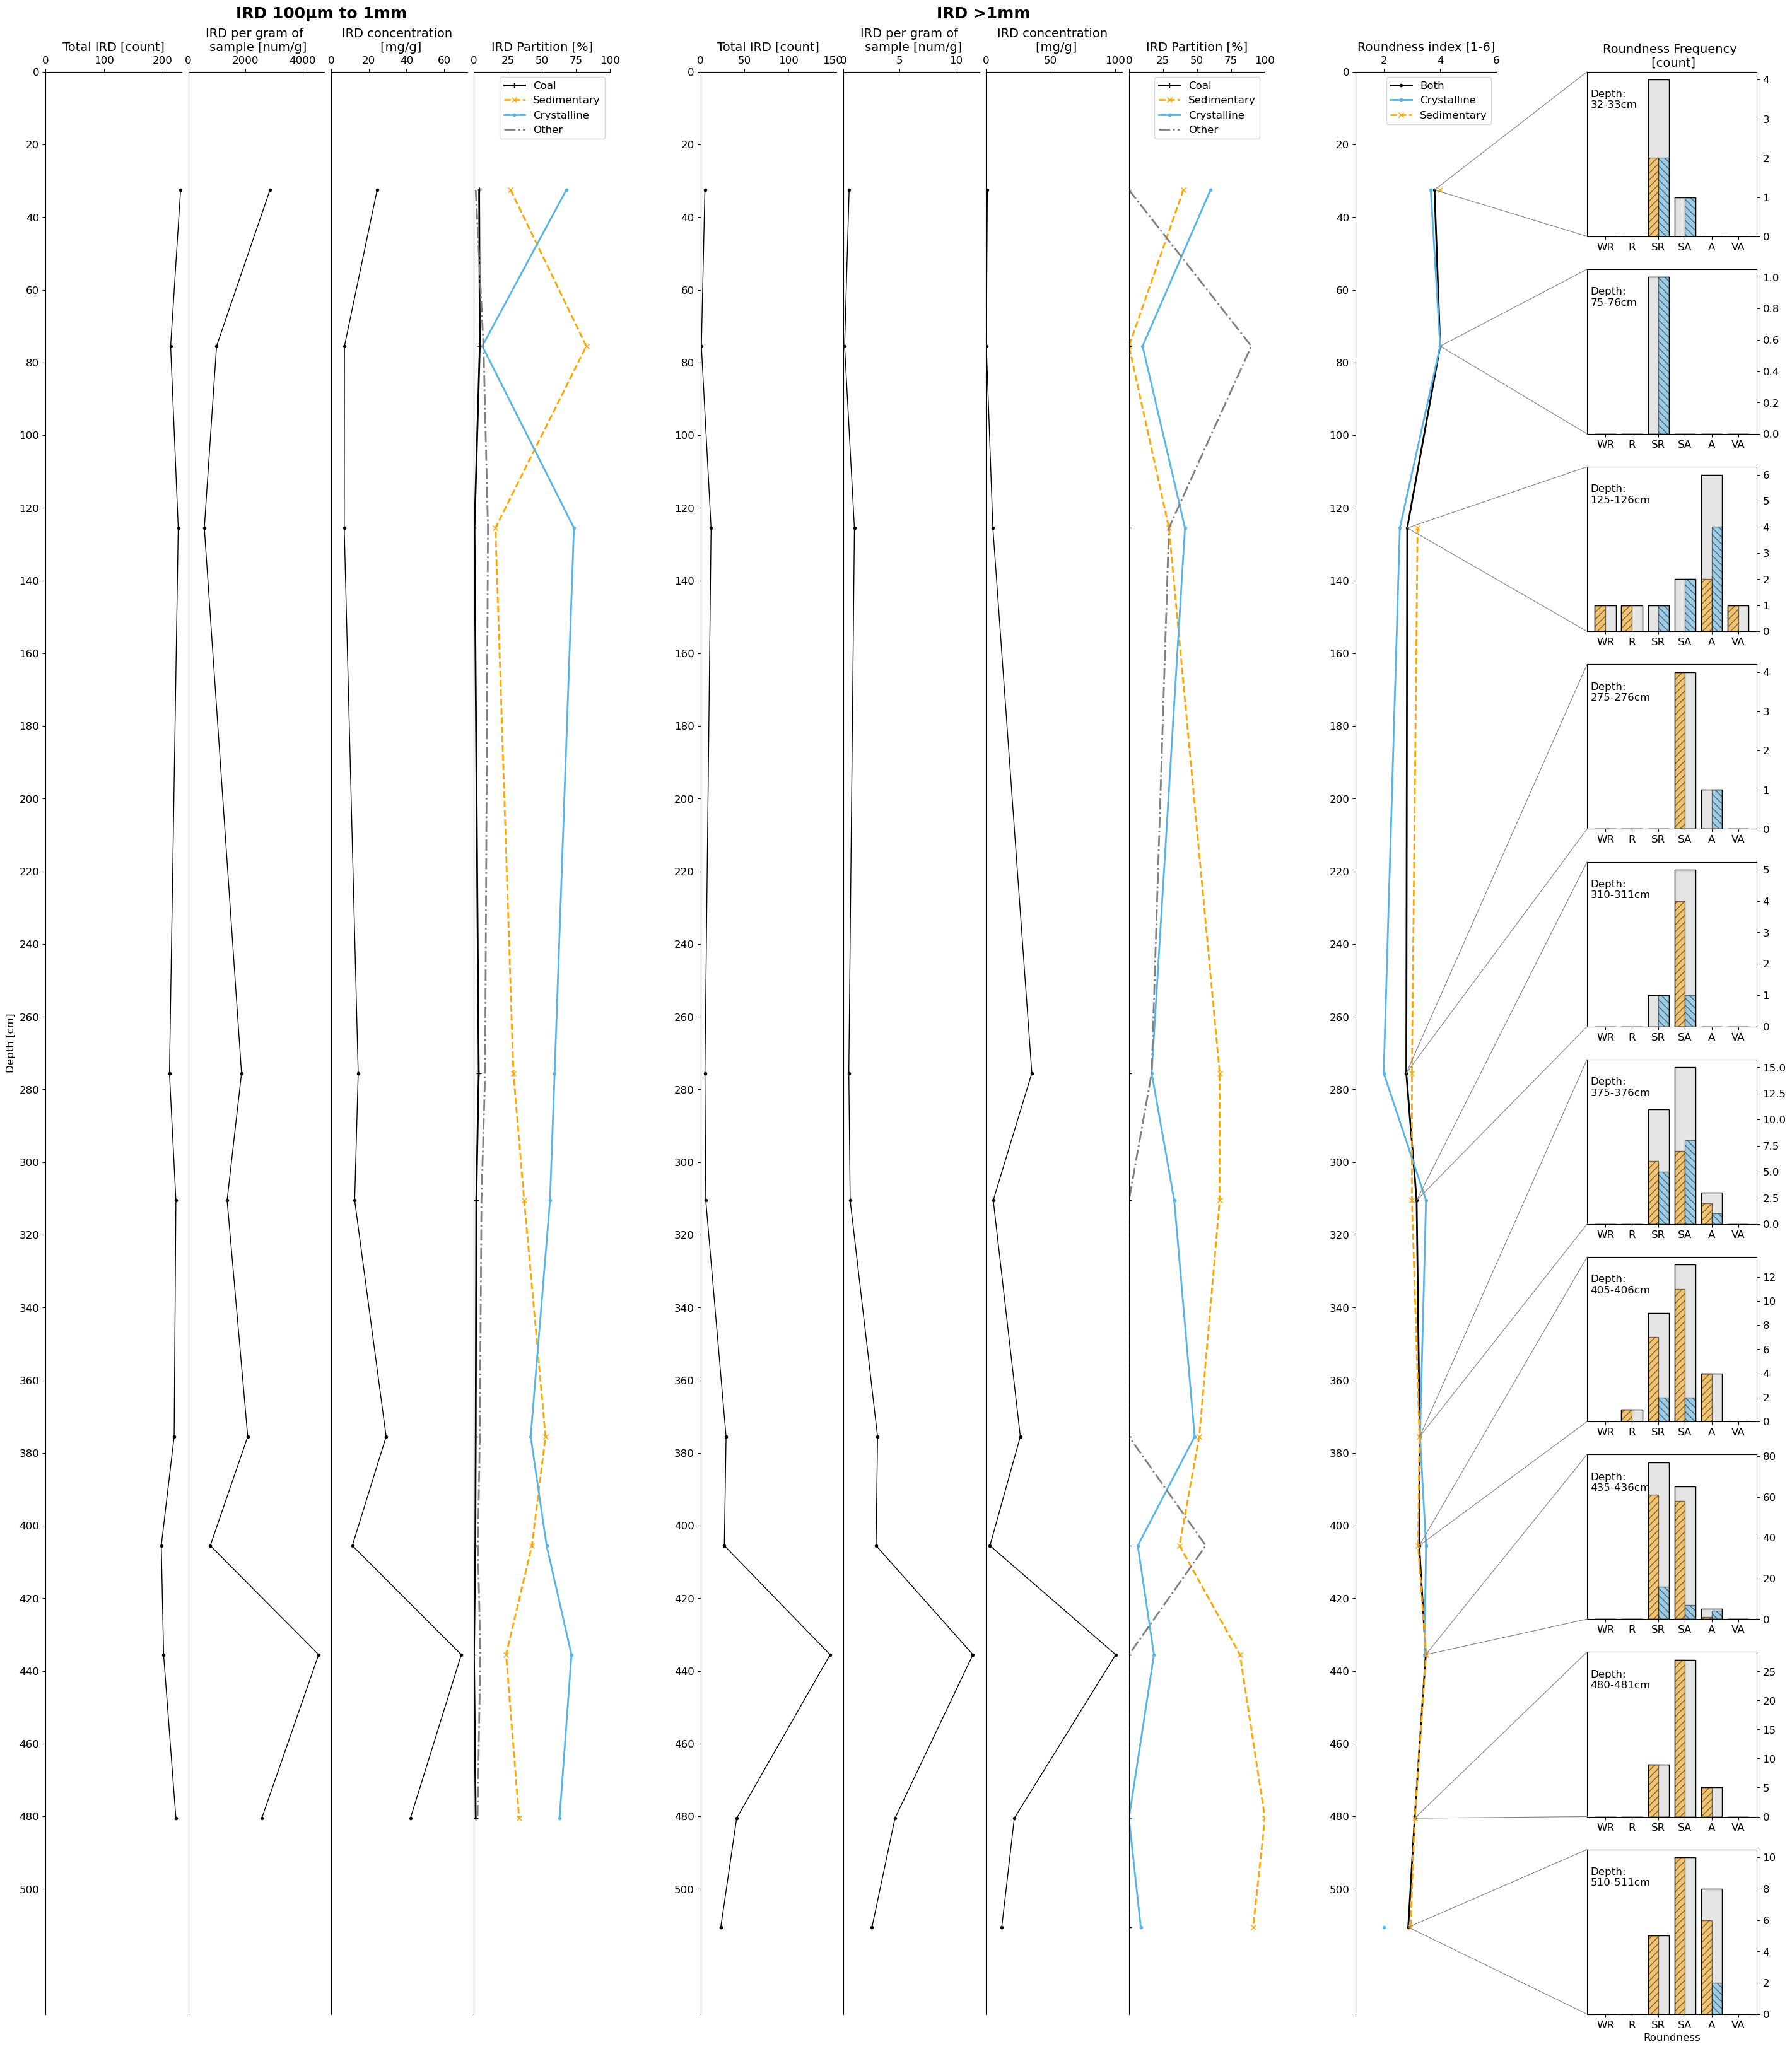

In [109]:

fig = plt.figure(figsize=(35, 40))

fig.text(0.25, 0.90, "IRD 100µm to 1mm", ha='center', va='bottom', fontsize=18, fontweight='bold')
fig.text(0.55, 0.90, "IRD >1mm", ha='center', va='bottom', fontsize=18, fontweight='bold')


# ── Top-level: 7 “columns” (4 groups + 3 gaps)
# width_ratios: [grp1, gap1, grp2, gap2, solo, gap3, grp4]
gs = gridspec.GridSpec(
    nrows=10, ncols=7,
    width_ratios=[4, 0.05, 4, 0.05, 1, 0.05, 1.2],
    figure=fig
)

axes = []

# ── Group 1: axes[0..3] (4 side-by-side), sharing Y
gs1 = gridspec.GridSpecFromSubplotSpec(
    nrows=1, ncols=4,
    subplot_spec=gs[:, 0],
    wspace=0.05
)
for i in range(4):
    if i == 0:
        ax = fig.add_subplot(gs1[0, i])
    else:
        ax = fig.add_subplot(gs1[0, i], sharey=axes[0])
    axes.append(ax)

# ── Group 2: axes[4..7] (4 side-by-side), sharing Y
gs2 = gridspec.GridSpecFromSubplotSpec(
    nrows=1, ncols=4,
    subplot_spec=gs[:, 2],
    wspace=0.05
)
for i in range(4):
    ax = fig.add_subplot(gs2[0, i], sharey=axes[0])
    axes.append(ax)

# ── Solo: axes[8]
ax = fig.add_subplot(gs[:, 4], sharey=axes[0])
axes.append(ax)

# ── Group 4: axes[9..18] (10 stacked rows)
gs4 = gridspec.GridSpecFromSubplotSpec(
    nrows=10, ncols=1,
    subplot_spec=gs[:, 6],
    hspace=0.2
)
for i in range(10):
    ax = fig.add_subplot(gs4[i, 0])
    axes.append(ax)

# axes[0], PLOT COUNT  1-100um
axes[0].plot(New_IRD_100um["total IRD"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k', label = '100um to 1mm')
axes[0].set_title('Total IRD [count]', loc='center', fontsize = 14)
axes[0].xaxis.tick_top()
axes[0].invert_yaxis()

axes[1].spines['bottom'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# axes[1], PLOT [count/gram]  1-100um
axes[1].plot(New_IRD_100um["IRD grains per gram of sample [num / g]"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[1].set_title('IRD per gram of \n sample [num/g]', loc='center', fontsize = 14)
axes[1].xaxis.tick_top()

axes[1].spines['bottom'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].tick_params(
    axis='y',        # apply to the y–axis
    which='both',    # major and minor ticks
    left=False,      # no left ticks
    labelleft=False  # no left tick‐labels
)

# axes[2], PLOT [mg/gram]  1-100um
axes[2].plot(New_IRD_100um["ConcentrationIRD [mg/g]"], New_IRD_100um['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[2].set_title('IRD concentration \n [mg/g]', loc='center', fontsize = 14)
axes[2].xaxis.tick_top()



# axes[3], PLOT OTHER, CRYS, SED, COAL%  1-100um
axes[3].plot(New_IRD_100um["Coal%"], New_IRD_100um['Depth'], linewidth = 2, marker = "+", color = 'black', label = 'Coal')
axes[3].plot(New_IRD_100um["Sedimentary%"], New_IRD_100um['Depth'], linewidth = 2, marker = "x", linestyle = '--', color = 'Orange', label = 'Sedimentary')
axes[3].plot(New_IRD_100um["Crystalline%"], New_IRD_100um['Depth'], linewidth = 2, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[3].plot(New_IRD_100um["Other%"], New_IRD_100um['Depth'], linewidth = 2, linestyle = "-.", color = 'grey', label = 'Other')
axes[3].set_title('IRD Partition [%]', loc='center', fontsize = 14)
axes[3].set_xlim(0, 100)
axes[3].legend(loc = 'upper right')
axes[3].xaxis.tick_top()

# axes[4], PLOT COUNT  1-100um
axes[4].plot(New_IRD_1mm["total IRD"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k', label = '100um to 1mm')
axes[4].set_title('Total IRD [count]', loc='center', fontsize = 14)
axes[4].xaxis.tick_top()

# axes[5], PLOT [count/gram]  1-100um
axes[5].plot(New_IRD_1mm["IRD grains per gram of sample [num / g]"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[5].set_title('IRD per gram of \n sample [num/g]', loc='center', fontsize = 14)
axes[5].xaxis.tick_top()

# axes[6], PLOT [mg/gram]  1-100um
axes[6].plot(New_IRD_1mm["ConcentrationIRD [mg/g]"], New_IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k')
axes[6].set_title('IRD concentration \n [mg/g]', loc='center', fontsize = 14)
axes[6].xaxis.tick_top()

# axes[7], PLOT OTHER, CRYS, SED, COAL%  1-100um
axes[7].plot(New_IRD_1mm["Coal%"], New_IRD_1mm['Depth'], linewidth = 2, marker = "+", color = 'black', label = 'Coal')
axes[7].plot(New_IRD_1mm["Sedimentary%"], New_IRD_1mm['Depth'], linewidth = 2, marker = "x", linestyle = '--', color = 'Orange', label = 'Sedimentary')
axes[7].plot(New_IRD_1mm["Crystalline%"], New_IRD_1mm['Depth'], linewidth = 2, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[7].plot(New_IRD_1mm["Other%"], New_IRD_1mm['Depth'], linewidth = 2, linestyle = "-.", color = 'grey', label = 'Other')
axes[7].set_title('IRD Partition [%]', loc='center', fontsize = 14)
axes[7].set_xlim(0, 100)
axes[7].legend()
axes[7].xaxis.tick_top()


# axes[8], PLOT RNDS INDEX LATER AFTER LOOP! 


# VERTICAL PLOTS (HISTOTGRAMS)

# Define roundness categories in desired order
roundness_order = ['WR', 'R', 'SR', 'SA', 'A', 'VA']
samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sample_depths = ["Depth:\n32-33cm", "Depth:\n75-76cm", "Depth:\n125-126cm", "Depth:\n275-276cm", "Depth:\n310-311cm", "Depth:\n375-376cm", "Depth:\n405-406cm", "Depth:\n435-436cm", "Depth:\n480-481cm", "Depth:\n510-511cm"]

offset = num_cols - 2


depths_plot = [32.5, 75.5, 125.5, 275.5, 310.5, 375.5, 405.5, 435.5, 480.5, 510.5]
list_R_ind_A = []
list_R_ind_C = []
list_R_ind_S = []

for i in samples:
    roundness_temp = RoundnessIRD[RoundnessIRD['Sample'] == i]
    roundnessC_temp = roundness_temp[roundness_temp['Type'] == 'C']
    roundnessS_temp = roundness_temp[roundness_temp['Type'] == 'S']

    # Count occurrences
    count_A = roundness_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)
    count_C = roundnessC_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)
    count_S = roundnessS_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)

    R_ind_A = roundness_temp['Value'].mean()
    R_ind_C = roundnessC_temp['Value'].mean()
    R_ind_S = roundnessS_temp['Value'].mean()

    list_R_ind_A.append(R_ind_A)
    list_R_ind_C.append(R_ind_C)
    list_R_ind_S.append(R_ind_S)

    x = np.arange(len(roundness_order))  # X locations for the groups
    width = 0.40  # Width of each bar

    # Plot bars with offset positions
    axes[i+offset].bar(x - 0.5*width,   count_S.values, width, label='Sedimentary', color='Orange', edgecolor='black', hatch = '///', alpha=0.5, zorder = 2)
    axes[i+offset].bar(x + 0.5*width,   count_C.values, width, label='Crystaline', color='#56B4E9', edgecolor='black', hatch = '\\\\\\', alpha=0.5, zorder = 3)

    axes[i+offset].bar(x, count_A.values, 2*width, facecolor='none', edgecolor='black', zorder = 4)

    axes[i+offset].bar(x, count_A.values, 2*width, label='Both', color='grey', edgecolor='black', alpha=0.2, zorder = 1)

    axes[i+offset].text(0.02, 0.78, sample_depths[i-1], transform=axes[i+offset].transAxes)

    axes[i+offset].set_xticks(range(len(roundness_order)))
    axes[i+offset].set_xticklabels(roundness_order)

    axes[i+offset].yaxis.tick_right()

# Formatting
axes[offset+1].set_title("Roundness Frequency \n [count]", fontsize=14)
axes[offset+10].set_xlabel("Roundness", fontsize=12)
#axes[4].legend()

# axes[8], PLOT RNDS INDEX
axes[8].plot(list_R_ind_A, depths_plot, linewidth = 2, marker = ".", linestyle = '-', color = 'k', label = 'Both')
axes[8].plot(list_R_ind_C, depths_plot, linewidth = 2, marker = ".", color = '#56B4E9', label = 'Crystalline')
axes[8].plot(list_R_ind_S, depths_plot, linewidth = 2, marker = "x", linestyle = '--', color = 'Orange', label = 'Sedimentary')

axes[8].set_title('Roundness index [1-6]', loc='center', fontsize = 14)
axes[8].xaxis.tick_top()
axes[8].legend()

axes[0].set_yticks(np.arange(0, 520, 20))
axes[0].set_ylabel('Depth [cm]')


axes[0].spines['bottom'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[4].spines['bottom'].set_visible(False)
axes[4].spines['right'].set_visible(False)

axes[8].spines['bottom'].set_visible(False)
axes[8].spines['right'].set_visible(False)


axes[0].set_xlim(left = 0)
axes[1].set_xlim(left = 0)
axes[2].set_xlim(left = 0)
axes[4].set_xlim(left = 0)
axes[5].set_xlim(left = 0)
axes[6].set_xlim(left = 0)

axes[8].set_xlim(1, 6)



hide_idx = list(range(1, 4)) + list(range(5, 8))  # group1:1–3, group2:5–7
for i in hide_idx:
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].tick_params(
        axis='y',        # apply to the y–axis
        which='both',    # major and minor ticks
        left=False,      # no left ticks
        labelleft=False  # no left tick‐labels
    )



x_data = list_R_ind_A
y_data = depths_plot
base_ax = axes[8]   

for i in range(10):

    zoom_ax = axes[i + 9]   # your small, stacked axes
    xi, yi   = x_data[i], y_data[i]

    # 1) corner positions of the small axes in FIGURE coords
    bbox = zoom_ax.get_position()
    tl = (bbox.x0, bbox.y1)
    bl = (bbox.x0, bbox.y0)

    # 2) data point in DISPLAY coords, then to FIGURE coords
    disp_pt = base_ax.transData.transform((xi, yi))
    fig_pt  = fig.transFigure.inverted().transform(disp_pt)

    # 3) draw two little “zoom” lines
    for corner in (tl, bl):
        ln = Line2D([corner[0], fig_pt[0]],
                    [corner[1], fig_pt[1]],
                    transform=fig.transFigure,
                    linewidth=0.8, color='gray')
        fig.add_artist(ln)











plt.show()

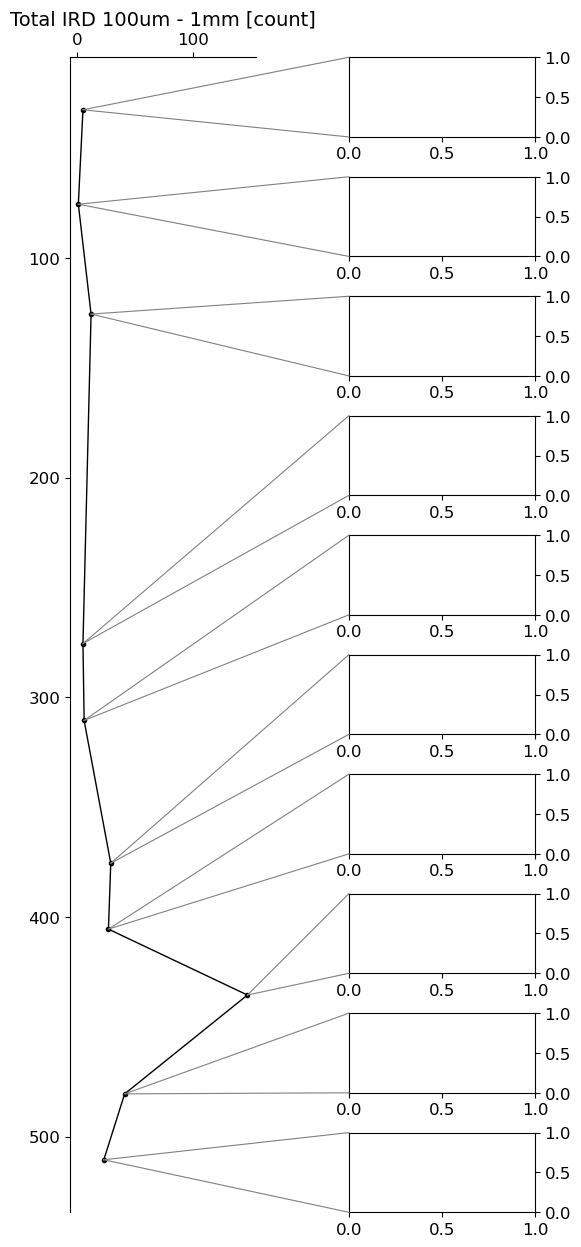

In [111]:
fig = plt.figure(figsize=(6, 15))

num_cols = 2

# Define a 10xnum_cols grid
gs = gridspec.GridSpec(nrows=10, ncols= num_cols, wspace=0.5, hspace=0.5)

axes = []

# First numcols-1 axes: span all 10 rows in their respective columns
for col in range(num_cols-1):
    if col == 0:
        ax = fig.add_subplot(gs[:, col])  # reference axis
    else:
        ax = fig.add_subplot(gs[:, col], sharey=axes[0])
   # ax = fig.add_subplot(gs[:, col])  # span all rows
    ax.set_title(f'Col {col+1}')
    axes.append(ax)

# Last column: 10 separate subplots, one per row
for row in range(10):
    ax = fig.add_subplot(gs[row, num_cols-1])  # individual row in last column
   # ax.set_title(f'Row {row+1}', fontsize=8)
    axes.append(ax)



# axes[0], PLOT NUM  1-100um

axes[0].plot(IRD_1mm["total IRD"], IRD_1mm['Depth'], linewidth = 1, marker = ".", linestyle = '-', color = 'k', label = '100um to 1mm')
axes[0].set_title('Total IRD 100um - 1mm [count]', loc='center', fontsize = 14)
axes[0].xaxis.tick_top()
axes[0].invert_yaxis()

axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)


depths_plot = [32.5, 75.5, 125.5, 275.5, 310.5, 375.5, 405.5, 435.5, 480.5, 510.5]

x_data = IRD_1mm["total IRD"].values
y_data = IRD_1mm["Depth"].values
base_ax = axes[0]   

for i in range(10):

    axes[i+1].yaxis.tick_right()

    zoom_ax = axes[i + 1]   # your small, stacked axes
    xi, yi   = x_data[i], y_data[i]

    # 1) corner positions of the small axes in FIGURE coords
    bbox = zoom_ax.get_position()
    tl = (bbox.x0, bbox.y1)
    bl = (bbox.x0, bbox.y0)

    # 2) data point in DISPLAY coords, then to FIGURE coords
    disp_pt = base_ax.transData.transform((xi, yi))
    fig_pt  = fig.transFigure.inverted().transform(disp_pt)

    # 3) draw two little “zoom” lines
    for corner in (tl, bl):
        ln = Line2D([corner[0], fig_pt[0]],
                    [corner[1], fig_pt[1]],
                    transform=fig.transFigure,
                    linewidth=0.8, color='gray')
        fig.add_artist(ln)


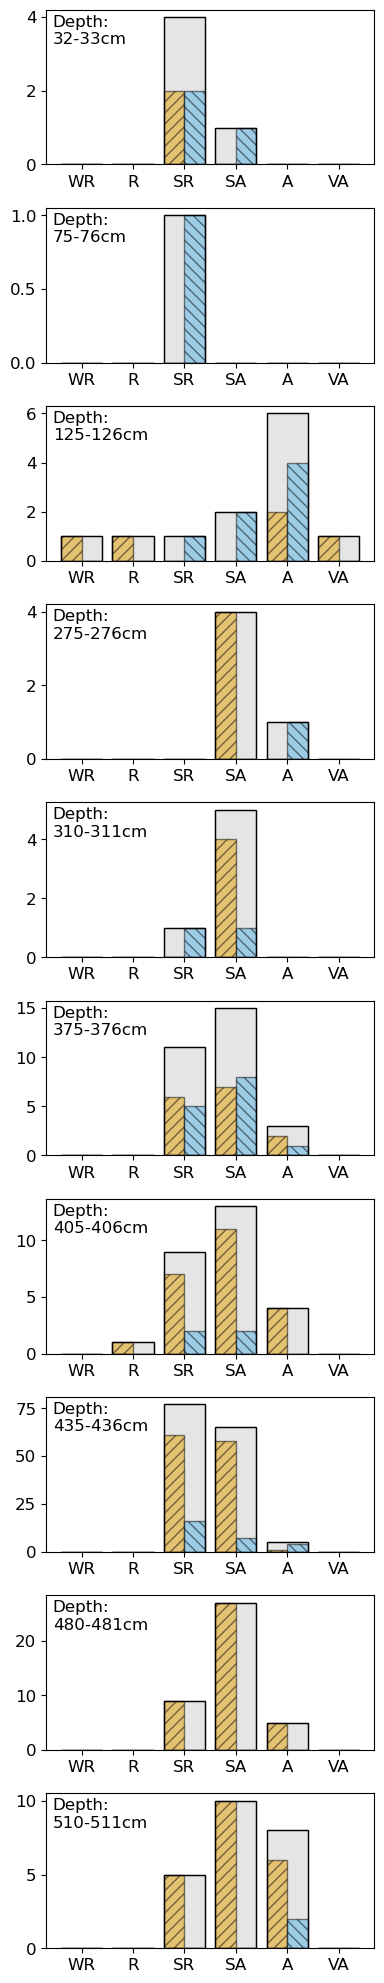

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

# Define roundness categories in desired order
roundness_order = ['WR', 'R', 'SR', 'SA', 'A', 'VA']
samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sample_depths = ["Depth:\n32-33cm", "Depth:\n75-76cm", "Depth:\n125-126cm", "Depth:\n275-276cm", "Depth:\n310-311cm", "Depth:\n375-376cm", "Depth:\n405-406cm", "Depth:\n435-436cm", "Depth:\n480-481cm", "Depth:\n510-511cm"]


# Set up subplot
fig, ax = plt.subplots(10, 1, figsize=(4, 20))

for i in samples:
    roundness_temp = RoundnessIRD[RoundnessIRD['Sample'] == i]
    roundnessC_temp = roundness_temp[roundness_temp['Type'] == 'C']
    roundnessS_temp = roundness_temp[roundness_temp['Type'] == 'S']

    # Count occurrences
    count_A = roundness_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)
    count_C = roundnessC_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)
    count_S = roundnessS_temp['Roundness'].value_counts().reindex(roundness_order, fill_value=0)






    x = np.arange(len(roundness_order))  # X locations for the groups
    width = 0.40  # Width of each bar

    # Plot bars with offset positions
    ax[i-1].bar(x - 0.5*width,   count_S.values, width, label='Sedimentary', color='#E69F00', edgecolor='black', hatch = '///', alpha=0.5, zorder = 2)
    ax[i-1].bar(x + 0.5*width,   count_C.values, width, label='Crystaline', color='#56B4E9', edgecolor='black', hatch = '\\\\\\', alpha=0.5, zorder = 3)

    ax[i-1].bar(x, count_A.values, 2*width, facecolor='none', edgecolor='black', zorder = 4)

    ax[i-1].bar(x, count_A.values, 2*width, label='Both', color='grey', edgecolor='black', alpha=0.2, zorder = 1)

    ax[i-1].text(0.02, 0.78, sample_depths[i-1], transform=ax[i-1].transAxes)

    ax[i-1].set_xticks(range(len(roundness_order)))
    ax[i-1].set_xticklabels(roundness_order)
"""
# Annotate bar counts
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.2, int(height), 
                ha='center', va='bottom', fontsize=10)
"""

# Formatting
axes[0].set_title("Roundness Frequency", fontsize=14)
axes[9].set_xlabel("Roundness", fontsize=12)
    
axes[0].legend()

fig.tight_layout()
plt.show()